# DSA312 Project

## Part 1 of Project
Requirements:
1. Key Message(s): Your report should focus on 1 (or at most 2) key message(s) that
are crucial for the audience to understand. These could be insights related to risk
factors, demographic trends, symptom prevalence, or other important findings
from the dataset.
2. Visualizations: Use clear and impactful visualizations to convey your key
message(s). These visualizations should be easily understandable to a general
audience and should highlight the most important trends or correlations in the
data.
3. Narrative: Accompany the visualizations with a concise narrative that explains
the significance of the findings. The narrative should be persuasive and aim to
engage the public, encouraging them to consider the implications of the data.

Note: I don't quite understand what we should be presenting on this part. Will it be a key message like "Symptoms X, Y, Z are most prevalent in causing lung cancer" and therefore we work towards proving that? Is there modelling that needs to be done or it is simply EDA?


Key message: Variable to Variable comparison
Question: How do we handle binary variables, in terms of correlation?


Key message: Lifestyle habits and their associated symptoms


Others:
Key message: Gender associated correlations
Question:


In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [79]:
# Load packages in and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/haoyang/Documents/DSwP/Group Project/lung cancer survey.csv')

In [83]:
# Original Dataset
# Get a summary of counts, means, and other statistics for numeric columns
summary_stats = df.describe()
print(summary_stats)

df


            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  9001.000000  9001.000000  9001.000000     9001.000000  9001.000000   
mean      0.536274    60.706588     0.521053        0.527941     0.456283   
std       0.498710    11.342242     0.499584        0.499246     0.498113   
min       0.000000    21.000000     0.000000        0.000000     0.000000   
25%       0.000000    48.000000     0.000000        0.000000     0.000000   
50%       1.000000    61.000000     1.000000        1.000000     0.000000   
75%       1.000000    71.000000     1.000000        1.000000     1.000000   
max       1.000000    81.000000     1.000000        1.000000     1.000000   

       PEER_PRESSURE  CHRONIC DISEASE     FATIGUE      ALLERGY      WHEEZING  \
count    9001.000000      9001.000000  9001.000000  9001.000000  9001.000000   
mean        0.510610         0.465726     0.687701     0.548272     0.490390   
std         0.499915         0.498852     0.463457     0.497692   

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
9095     NaN   NaN      NaN             NaN      NaN            NaN   
9096     NaN   NaN      NaN             NaN      NaN            NaN   
9097     NaN   NaN      NaN             NaN      NaN            NaN   
9098     NaN   NaN      NaN             NaN      NaN            NaN   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                 0.0       1.0       0.0       0.0                0.0   
1                 1.0       0.0       1.0       1.0                0.0   
2                 1.0       1.0       0.0       0.0                0.0   
3                 0.0       1.0       0.0       1.0                1.0   
4                 0.0       1.0       1.0       0.0                1.0   
...               ...       ...       ...       ...                ...   
9095              NaN       NaN       NaN       NaN                NaN   
9096              NaN       NaN       NaN       NaN                NaN   
9097              NaN       NaN       NaN       NaN                NaN   
9098              NaN       NaN       NaN       NaN                NaN   
9099              0.0       1.0       1.0       1.0                1.0   

      COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0          0.0                  1.0                    0.0         0.0   
1          1.0                  1.0                    0.0         0.0   
2          0.0                  0.0                    0.0         1.0   
3          1.0                  1.0                    0.0         1.0   
4          0.0                  0.0                    1.0         0.0   
...        ...                  ...                    ...         ...   
9095       NaN                  NaN                    NaN         NaN   
9096       NaN                  NaN                    NaN         NaN   
9097       NaN                  NaN                    NaN         NaN   
9098       NaN                  NaN                    NaN         NaN   
9099       0.0                  0.0                    1.0         0.0   

      LUNG_CANCER  
0             1.0  
1             1.0  
2             0.0  
3             1.0  
4             1.0  
...           ...  
9095          NaN  
9096          NaN  
9097          NaN  
9098          NaN  
9099          1.0  

[9100 rows x 16 columns]

### Data Cleaning
* Remove NA values
    * Reason: The dataset pertains to each individual and their health characteristics are different person to person. Hence the dataset is non-sequential and therefore depends on health patterns to ascertain whether NA values should be filled with either 0 or 1. By filling NA values, it may introduce bias and lead to an inaccurate insights.

In [89]:
df_no_NA = df.dropna()
df_final = df_no_NA[df_no_NA["AGE"] > 21]
df_final
yxz = df_no_NA.describe()
print(yxz)
df_no_NA


GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
8996     1.0  62.0      0.0             1.0      1.0            1.0   
8997     0.0  71.0      1.0             1.0      1.0            0.0   
8998     1.0  63.0      1.0             0.0      0.0            1.0   
8999     1.0  70.0      1.0             1.0      0.0            0.0   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                 0.0       1.0       0.0       0.0                0.0   
1                 1.0       0.0       1.0       1.0                0.0   
2                 1.0       1.0       0.0       0.0                0.0   
3                 0.0       1.0       0.0       1.0                1.0   
4                 0.0       1.0       1.0       0.0                1.0   
...               ...       ...       ...       ...                ...   
8996              0.0       1.0       0.0       0.0                0.0   
8997              0.0       0.0       1.0       0.0                1.0   
8998              0.0       0.0       0.0       0.0                0.0   
8999              1.0       1.0       1.0       0.0                1.0   
9099              0.0       1.0       1.0       1.0                1.0   

      COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0          0.0                  1.0                    0.0         0.0   
1          1.0                  1.0                    0.0         0.0   
2          0.0                  0.0                    0.0         1.0   
3          1.0                  1.0                    0.0         1.0   
4          0.0                  0.0                    1.0         0.0   
...        ...                  ...                    ...         ...   
8996       0.0                  0.0                    1.0         1.0   
8997       1.0                  1.0                    0.0         1.0   
8998       1.0                  1.0                    0.0         0.0   
8999       0.0                  1.0                    0.0         1.0   
9099       0.0                  0.0                    1.0         0.0   

      LUNG_CANCER  
0             1.0  
1             1.0  
2             0.0  
3             1.0  
4             1.0  
...           ...  
8996          1.0  
8997          1.0  
8998          0.0  
8999          1.0  
9099          1.0  

[9000 rows x 16 columns]

            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  9001.000000  9001.000000  9001.000000     9001.000000  9001.000000   
mean      0.536274    60.706588     0.521053        0.527941     0.456283   
std       0.498710    11.342242     0.499584        0.499246     0.498113   
min       0.000000    21.000000     0.000000        0.000000     0.000000   
25%       0.000000    48.000000     0.000000        0.000000     0.000000   
50%       1.000000    61.000000     1.000000        1.000000     0.000000   
75%       1.000000    71.000000     1.000000        1.000000     1.000000   
max       1.000000    81.000000     1.000000        1.000000     1.000000   

       PEER_PRESSURE  CHRONIC DISEASE     FATIGUE      ALLERGY      WHEEZING  \
count    9001.000000      9001.000000  9001.000000  9001.000000  9001.000000   
mean        0.510610         0.465726     0.687701     0.548272     0.490390   
std         0.499915         0.498852     0.463457     0.497692   

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
8996     1.0  62.0      0.0             1.0      1.0            1.0   
8997     0.0  71.0      1.0             1.0      1.0            0.0   
8998     1.0  63.0      1.0             0.0      0.0            1.0   
8999     1.0  70.0      1.0             1.0      0.0            0.0   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                 0.0       1.0       0.0       0.0                0.0   
1                 1.0       0.0       1.0       1.0                0.0   
2                 1.0       1.0       0.0       0.0                0.0   
3                 0.0       1.0       0.0       1.0                1.0   
4                 0.0       1.0       1.0       0.0                1.0   
...               ...       ...       ...       ...                ...   
8996              0.0       1.0       0.0       0.0                0.0   
8997              0.0       0.0       1.0       0.0                1.0   
8998              0.0       0.0       0.0       0.0                0.0   
8999              1.0       1.0       1.0       0.0                1.0   
9099              0.0       1.0       1.0       1.0                1.0   

      COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0          0.0                  1.0                    0.0         0.0   
1          1.0                  1.0                    0.0         0.0   
2          0.0                  0.0                    0.0         1.0   
3          1.0                  1.0                    0.0         1.0   
4          0.0                  0.0                    1.0         0.0   
...        ...                  ...                    ...         ...   
8996       0.0                  0.0                    1.0         1.0   
8997       1.0                  1.0                    0.0         1.0   
8998       1.0                  1.0                    0.0         0.0   
8999       0.0                  1.0                    0.0         1.0   
9099       0.0                  0.0                    1.0         0.0   

      LUNG_CANCER  
0             1.0  
1             1.0  
2             0.0  
3             1.0  
4             1.0  
...           ...  
8996          1.0  
8997          1.0  
8998          0.0  
8999          1.0  
9099          1.0  

[9001 rows x 16 columns]

In [62]:
df_no_NA.corr()

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.005121 -0.011204       -0.031851 -0.039574   
AGE                   -0.005121  1.000000  0.008218        0.004931  0.033277   
SMOKING               -0.011204  0.008218  1.000000        0.001762  0.013410   
YELLOW_FINGERS        -0.031851  0.004931  0.001762        1.000000  0.062438   
ANXIETY               -0.039574  0.033277  0.013410        0.062438  1.000000   
PEER_PRESSURE         -0.074299  0.007946 -0.026587        0.055463  0.040571   
CHRONIC DISEASE       -0.004493 -0.008739 -0.029539        0.008865 -0.032972   
FATIGUE               -0.049291  0.053313  0.001766       -0.001420 -0.017996   
ALLERGY                0.053043 -0.019802  0.024401       -0.028347 -0.047399   
WHEEZING               0.036939  0.002060 -0.032444       -0.043330 -0.039278   
ALCOHOL CONSUMING      0.040613 -0.004552 -0.020049       -0.075574 -0.001719   
COUGHING               0.027497  0.004055 -0.007259        0.015023 -0.058511   
SHORTNESS OF BREATH    0.017756  0.018253 -0.003767        0.015969 -0.005259   
SWALLOWING DIFFICULTY -0.009172 -0.006684 -0.004173        0.065171  0.078166   
CHEST PAIN             0.044022  0.021036  0.009905       -0.018138 -0.053274   
LUNG_CANCER           -0.141054  0.052295  0.063122        0.217688  0.035343   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.074299        -0.004493 -0.049291  0.053043   
AGE                         0.007946        -0.008739  0.053313 -0.019802   
SMOKING                    -0.026587        -0.029539  0.001766  0.024401   
YELLOW_FINGERS              0.055463         0.008865 -0.001420 -0.028347   
ANXIETY                     0.040571        -0.032972 -0.017996 -0.047399   
PEER_PRESSURE               1.000000         0.009144 -0.004161 -0.055760   
CHRONIC DISEASE             0.009144         1.000000 -0.010018  0.024454   
FATIGUE                    -0.004161        -0.010018  1.000000 -0.025919   
ALLERGY                    -0.055760         0.024454 -0.025919  1.000000   
WHEEZING                   -0.054164        -0.010565 -0.028060  0.049535   
ALCOHOL CONSUMING          -0.057258        -0.028762 -0.020050  0.064963   
COUGHING                   -0.051231        -0.074966 -0.001837  0.025221   
SHORTNESS OF BREATH        -0.048003        -0.007838  0.046563 -0.007681   
SWALLOWING DIFFICULTY       0.106275         0.050193 -0.022588 -0.027740   
CHEST PAIN                 -0.020900        -0.023414 -0.015474  0.013260   
LUNG_CANCER                 0.057848        -0.021166  0.085268  0.106620   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.036939           0.040613  0.027497   
AGE                    0.002060          -0.004552  0.004055   
SMOKING               -0.032444          -0.020049 -0.007259   
YELLOW_FINGERS        -0.043330          -0.075574  0.015023   
ANXIETY               -0.039278          -0.001719 -0.058511   
PEER_PRESSURE         -0.054164          -0.057258 -0.051231   
CHRONIC DISEASE       -0.010565          -0.028762 -0.074966   
FATIGUE               -0.028060          -0.020050 -0.001837   
ALLERGY                0.049535           0.064963  0.025221   
WHEEZING               1.000000           0.126359  0.049263   
ALCOHOL CONSUMING      0.126359           1.000000  0.071122   
COUGHING               0.049263           0.071122  1.000000   
SHORTNESS OF BREATH    0.010107          -0.011923  0.034003   
SWALLOWING DIFFICULTY  0.028040          -0.031207 -0.083041   
CHEST PAIN             0.010026           0.024991  0.021203   
LUNG_CANCER           -0.080421           0.207586 -0.000480   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                            0.017756              -0.009172    0.044022   
AGE                               0.018253              -0.006684    0.021036   
SMOKI

In [64]:
# Pairplot of the dataset to visualize relationships
# import seaborn as sns
# sns.pairplot(df_no_NA)
# plt.show()
# Well this is useless


In [66]:
# Drop duplicates and retry correlation
df_noNA_nodupe = df_no_NA.drop_duplicates()
df_noNA_nodupe.corr()

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.002546 -0.009651       -0.030269 -0.039215   
AGE                    0.002546  1.000000  0.008885        0.004350  0.028852   
SMOKING               -0.009651  0.008885  1.000000        0.002245  0.010178   
YELLOW_FINGERS        -0.030269  0.004350  0.002245        1.000000  0.058266   
ANXIETY               -0.039215  0.028852  0.010178        0.058266  1.000000   
PEER_PRESSURE         -0.070698  0.001188 -0.025797        0.051443  0.036539   
CHRONIC DISEASE       -0.007110 -0.009103 -0.031462        0.008855 -0.033396   
FATIGUE               -0.048474  0.053279  0.001173       -0.003119 -0.014702   
ALLERGY                0.050912 -0.015201  0.020697       -0.028556 -0.043283   
WHEEZING               0.033538  0.002809 -0.032292       -0.035641 -0.037046   
ALCOHOL CONSUMING      0.040411 -0.006120 -0.020273       -0.072353  0.000338   
COUGHING               0.024643  0.009773 -0.006757        0.017022 -0.055565   
SHORTNESS OF BREATH    0.018157  0.021753 -0.002966        0.013730 -0.004753   
SWALLOWING DIFFICULTY -0.006810 -0.010018 -0.004403        0.063829  0.074640   
CHEST PAIN             0.040800  0.023812  0.009466       -0.017009 -0.048018   
LUNG_CANCER           -0.137448  0.048891  0.061205        0.212183  0.034957   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.070698        -0.007110 -0.048474  0.050912   
AGE                         0.001188        -0.009103  0.053279 -0.015201   
SMOKING                    -0.025797        -0.031462  0.001173  0.020697   
YELLOW_FINGERS              0.051443         0.008855 -0.003119 -0.028556   
ANXIETY                     0.036539        -0.033396 -0.014702 -0.043283   
PEER_PRESSURE               1.000000         0.008027 -0.005005 -0.055314   
CHRONIC DISEASE             0.008027         1.000000 -0.008364  0.021735   
FATIGUE                    -0.005005        -0.008364  1.000000 -0.027673   
ALLERGY                    -0.055314         0.021735 -0.027673  1.000000   
WHEEZING                   -0.053242        -0.008620 -0.025610  0.049766   
ALCOHOL CONSUMING          -0.057140        -0.026779 -0.018208  0.061805   
COUGHING                   -0.047792        -0.069688 -0.003024  0.024902   
SHORTNESS OF BREATH        -0.044708        -0.008724  0.042335 -0.007789   
SWALLOWING DIFFICULTY       0.098405         0.045973 -0.020267 -0.026147   
CHEST PAIN                 -0.019257        -0.025592 -0.019235  0.010789   
LUNG_CANCER                 0.054622        -0.020037  0.082777  0.106173   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.033538           0.040411  0.024643   
AGE                    0.002809          -0.006120  0.009773   
SMOKING               -0.032292          -0.020273 -0.006757   
YELLOW_FINGERS        -0.035641          -0.072353  0.017022   
ANXIETY               -0.037046           0.000338 -0.055565   
PEER_PRESSURE         -0.053242          -0.057140 -0.047792   
CHRONIC DISEASE       -0.008620          -0.026779 -0.069688   
FATIGUE               -0.025610          -0.018208 -0.003024   
ALLERGY                0.049766           0.061805  0.024902   
WHEEZING               1.000000           0.124436  0.049211   
ALCOHOL CONSUMING      0.124436           1.000000  0.070660   
COUGHING               0.049211           0.070660  1.000000   
SHORTNESS OF BREATH    0.012695          -0.009341  0.034108   
SWALLOWING DIFFICULTY  0.030003          -0.029743 -0.077187   
CHEST PAIN             0.009450           0.026531  0.017161   
LUNG_CANCER           -0.076401           0.205574 -0.000191   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                            0.018157              -0.006810    0.040800   
AGE                               0.021753              -0.010018    0.023812   
SMOKI

In [105]:
# Visualisation of non-duplicates, non-NAs
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df4 = pd.DataFrame(rs.rand(10, 10))
corr = df_noNA_nodupe.corr()
corr.style.background_gradient(cmap='coolwarm')

* Manipulating Age Column
    * Step 1: Deduce the range of data using the use of histogram and table.

<Figure size 1000x600 with 0 Axes>

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.530e+03, 9.740e+02,
        1.380e+03, 1.373e+03, 1.116e+03, 1.625e+03]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Patient Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

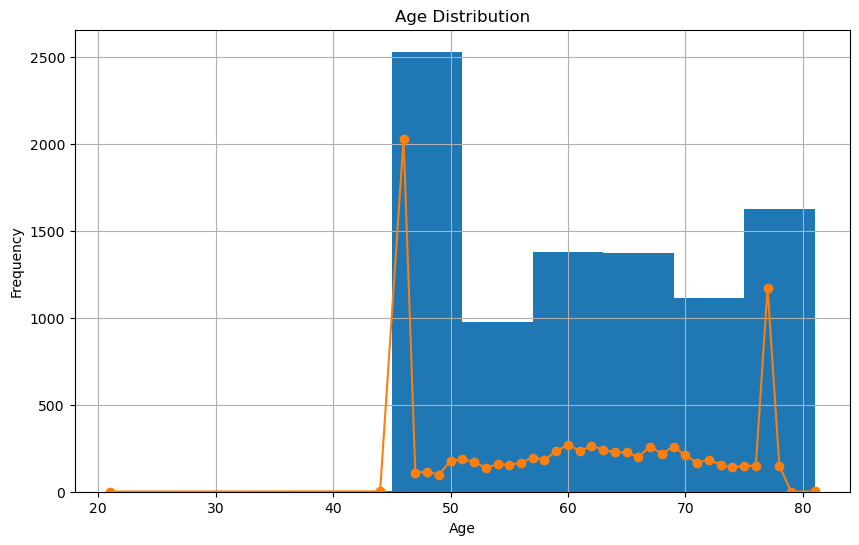

In [103]:
# Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_no_NA['AGE'])
plt.title('Histogram of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Count the frequency of each age
age_counts = df_no_NA['AGE'].value_counts().sort_index()

# Plot a line graph of the age counts
plt.plot(age_counts.index, age_counts.values, marker='o')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [22]:
# AGE Distribution Table
df_no_NA.groupby("AGE")["AGE"].count()

AGE
21.0       1
44.0       2
46.0    2030
47.0     110
48.0     116
49.0      97
50.0     177
51.0     186
52.0     173
53.0     136
54.0     159
55.0     152
56.0     168
57.0     195
58.0     184
59.0     233
60.0     270
61.0     235
62.0     263
63.0     242
64.0     226
65.0     226
66.0     201
67.0     260
68.0     218
69.0     260
70.0     209
71.0     167
72.0     185
73.0     155
74.0     140
75.0     148
76.0     150
77.0    1174
78.0     150
79.0       1
81.0       2
Name: AGE, dtype: int64

*Conclusion from above*
1. We see consistent and moderate number of observations from age 47 to age 76
2. We see outliers in the tail ends of the dataset, mainly, ages 21, 44, 79 and 81. It is important to note that ages 44, 79 and 81 is not too far off from the ages (middle age & senior) and may exhibit similar health patterns. As for age 21, there is a large gap and this observation may give a different
3. Lastly, large observations centres at ages 46 and 77 which may skew results if we consider all ages. Less variance may be observed if we create age groups that exhibit similar health patterns.

* Outlier Analysis
    * I am not too familiar with this form of analysis and how to determine. As we are dealing with age, the boxplot does not take into consideration of health patterns. Intuitively, we can just omit the 21 year old observation, stating that it is of the very far from the mean age of this dataset.

<Axes: xlabel='AGE'>

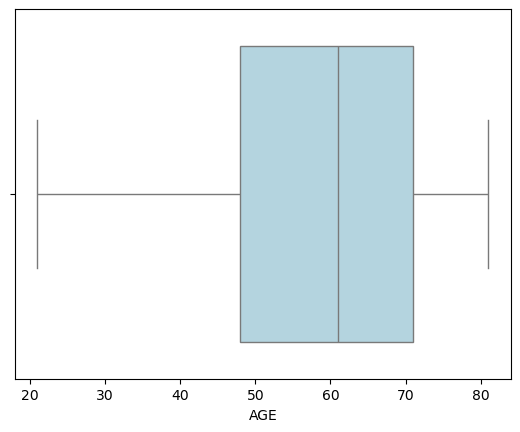

In [101]:
# Method 1: Boxplot
sns.boxplot(x=df_no_NA['AGE'], color='lightblue')
plt.show()                             

Text(0.5, 1.0, 'AGE vs. LUNG_CANCER')

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'LUNG_CANCER')

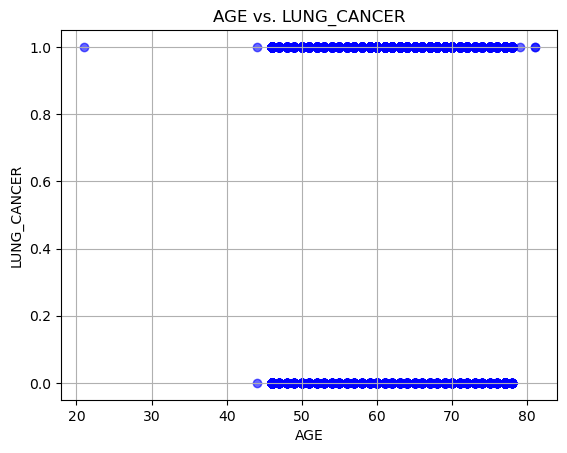

In [26]:
# Just to see the deviations better with a scatter plot
plt.scatter(df['AGE'], df["LUNG_CANCER"], color='blue', alpha=0.6)
plt.title("AGE vs. LUNG_CANCER")
plt.xlabel('AGE')
plt.ylabel("LUNG_CANCER")
plt.grid(True)
plt.show()



In [71]:
# I am assuming the 21 yr old is an extreme outlier, and therefore we take observations from ages 44 to 81 as our main sample.
# This means our analysis is targeted at the middle age to senior age groups.

df_cleaned = df_no_NA[df_no_NA["AGE"] > 21]
df_cleaned

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
8996     1.0  62.0      0.0             1.0      1.0            1.0   
8997     0.0  71.0      1.0             1.0      1.0            0.0   
8998     1.0  63.0      1.0             0.0      0.0            1.0   
8999     1.0  70.0      1.0             1.0      0.0            0.0   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                 0.0       1.0       0.0       0.0                0.0   
1                 1.0       0.0       1.0       1.0                0.0   
2                 1.0       1.0       0.0       0.0                0.0   
3                 0.0       1.0       0.0       1.0                1.0   
4                 0.0       1.0       1.0       0.0                1.0   
...               ...       ...       ...       ...                ...   
8996              0.0       1.0       0.0       0.0                0.0   
8997              0.0       0.0       1.0       0.0                1.0   
8998              0.0       0.0       0.0       0.0                0.0   
8999              1.0       1.0       1.0       0.0                1.0   
9099              0.0       1.0       1.0       1.0                1.0   

      COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0          0.0                  1.0                    0.0         0.0   
1          1.0                  1.0                    0.0         0.0   
2          0.0                  0.0                    0.0         1.0   
3          1.0                  1.0                    0.0         1.0   
4          0.0                  0.0                    1.0         0.0   
...        ...                  ...                    ...         ...   
8996       0.0                  0.0                    1.0         1.0   
8997       1.0                  1.0                    0.0         1.0   
8998       1.0                  1.0                    0.0         0.0   
8999       0.0                  1.0                    0.0         1.0   
9099       0.0                  0.0                    1.0         0.0   

      LUNG_CANCER  
0             1.0  
1             1.0  
2             0.0  
3             1.0  
4             1.0  
...           ...  
8996          1.0  
8997          1.0  
8998          0.0  
8999          1.0  
9099          1.0  

[9000 rows x 16 columns]

### Clustering Methods

Now that NA values are removed and the outlier has been removed, we have the final cleaned dataset.
As all other variables are binary, it might be good to cluster the age and make binary variables out of them. Might need to check with prof on how far can we manipulate the dataset given to us.
* Method 1: Manually taking age intervals, meaning 44 to 54, 55 to 65, 66 to 81 (Or any other intervals)
    * One possible methodology is: To ensure equal spread of observation between each age group (Enough observations to analyse patterns)
* Method 2: K prototype clustering. ([link](https://medium.com/@reddyyashu20/k-means-kmodes-and-k-prototype-76537d84a669))
    * This is a methodology that handles numerical and binary features in a dataset. The codes are following the link above

In [18]:
# Method 1: Define binary columns for age intervals 
# df_cleaned['age_44_to_56'] = (df_cleaned['Age'] < 57).astype(int)
# df_cleaned['age_57_to_69'] = ((df_cleaned['Age'] >= 57) & (df['Age'] < 70)).astype(int)
# df['age_70_and_above'] = (df['Age'] >= 70).astype(int)

In [30]:
!pip install kmodes.kprototypes

ERROR: Could not find a version that satisfies the requirement kmodes.kprototypes (from versions: none)
ERROR: No matching distribution found for kmodes.kprototypes


In [28]:
# Method 2: # This code chunk takes awhile (Do not run this code)
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]

# Calculate cost for different cluster numbers
costs = []
for num_clusters in range(1, 10): # From 1 to 9
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=2)
    kproto.fit_predict(df_cleaned, categorical= cat_cols)
    costs.append(kproto.cost_)

# Plot the elbow curve, selection of optimal number of cluster via graphical approach
plt.plot(range(1, 10), costs, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()


ModuleNotFoundError: No module named 'kmodes'

From the graph above, steepest drop is at cluster 2 and the graph starts to flatten out after cluster 3. We can consider these two clusters in our analysis. Intuitively, I would think of these age groups to be middle age and seniors and it make logical sense to consider 2 instead of 3. As such, I have gone with cluster 2 for this example. However, health patterns may be exhibited better at cluster 3. This can be taken into consideration in Part 2 of the project when we are creating our model.

In [17]:
# Fit K-Prototypes model
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(df_cleaned, categorical=cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 837, ncost: 586261.3943873475
Run: 1, iteration: 2/100, moves: 369, ncost: 580148.0291794365
Run: 1, iteration: 3/100, moves: 205, ncost: 578297.0209240393
Run: 1, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 757, ncost: 583992.8070376596
Run: 2, iteration: 2/100, moves: 312, ncost: 579870.6612169943
Run: 2, iteration: 3/100, moves: 189, ncost: 578297.0209240393
Run: 2, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 515, ncost: 578297.0650739784
Run: 3, iteration: 2/100, moves: 1, ncost: 578297.0209240393
Run: 3, iteration: 3/100, moves: 0, ncost: 578297.0209240393

In [73]:
# Assign cluster labels to the DataFrame
df_cleaned['cluster'] = clusters

# See how clusters are grouped
age_cluster_summary = df_cleaned.groupby('cluster')['AGE'].agg(['min', 'max'])
print(age_cluster_summary) # We see here, we have grouped cluster = 0 as age 61 to 81, and cluster = 1 as age 44 to 60.

df_cleaned['cluster'].value_counts() # Each clusters are approximately similarly in number of observation.

          min   max
cluster            
0        61.0  81.0
1        44.0  60.0


/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_23467/3236544762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = clusters


cluster
0    4612
1    4388
Name: count, dtype: int64

### Types of Analysis

#### Calculating correlation using Phi ([link](https://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html#:~:text=Computationally%2C%20phi%20is%20the%20square,chi%2Dsquare%20is%20not%20used.))

* Useful method for calculating correlation between binary variables


In [1]:
from scipy.stats import chi2_contingency
import numpy as np

df_cleaned['cluster'] = df_cleaned['cluster'].astype(float)
df_cleaned = df_cleaned.drop(columns=['AGE'])

def phi_coefficient(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform Chi-Square test
    chi2, _, _, _ = chi2_contingency(contingency_table, correction=False)
    
    # Total number of observations
    n = contingency_table.sum().sum()
    
    # Compute Phi Coefficient
    phi = (chi2 / n) ** 0.5
    return phi

# Creating a correlation matrix
corr_matrix = pd.DataFrame(index=df_cleaned.columns, columns=df_cleaned.columns)
results = []
for col1 in df_cleaned.columns:
    for col2 in df_cleaned.columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = phi_coefficient(df_cleaned[col1], df_cleaned[col2])
        else:
            corr_matrix.loc[col1, col2] = np.nan  # Diagonal elements are not needed
        

print(corr_matrix)


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5)
plt.title('Phi Coefficient Heatmap')
plt.show()

# Obtaining features with strong associations
results = []

def categorize_association(phi):
    if abs(phi) < 0.1:
        return 'Weak association'
    elif abs(phi) < 0.3:
        return 'Moderate association'
    else:
        return 'Strong association'

# Iterate over the correlation matrix
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            phi = corr_matrix.loc[col1, col2]
            association = categorize_association(phi)
            
            # Append the results
            results.append({
                'Feature1': col1,
                'Feature2': col2,
                'Association': association,
                'Phi Coefficient': phi
            })

# Create a DataFrame from the results
results_df = pd.DataFrame(results):

# Display the results
print(results_df)

print(results_df[results_df["Association"]== "Moderate association"])

NameError: name 'df_cleaned' is not defined

Moderate association:
* GENDER & LUNG CANCER (Important Feature)
* YELLOW FINGERS & LUNG CANCER (Important Feature)
* PEER PRESSURE & SWALLOWING DIFFICULTY
* ALLERGY & LUNG ALLERGY (Important Feature)
* WHEEZING * ALCOHOL CONSUMPTION

Generally good as variables are not highly correlated with one another. Fulfills the multi-collinearity conditions.

#### General counts of variables and cluster group
This section covers how data is split between the two groups and by the symptoms displayed

GENDER  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
cluster                                                            
0.0      2460.0   2414.0          2426.0   2203.0         2360.0   
1.0      2367.0   2275.0          2326.0   1904.0         2236.0   

         CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
cluster                                                                     
0.0               2110.0    3293.0    2513.0    2281.0             2396.0   
1.0               2081.0    2896.0    2421.0    2133.0             2331.0   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
cluster                                                                     
0.0        2722.0               3257.0                 1600.0      2958.0   
1.0        2623.0               3025.0                 1532.0      2693.0   

         LUNG_CANCER  
cluster               
0.0           3782.0  
1.0           3463.0

<Axes: >

Text(0, 0.5, 'Total count')

Text(0.5, 0, 'Variables')

Text(0.5, 1.0, 'Positive conditions by Cluster')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'GENDER'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN'),
  Text(14, 0, 'LUNG_CANCER')])

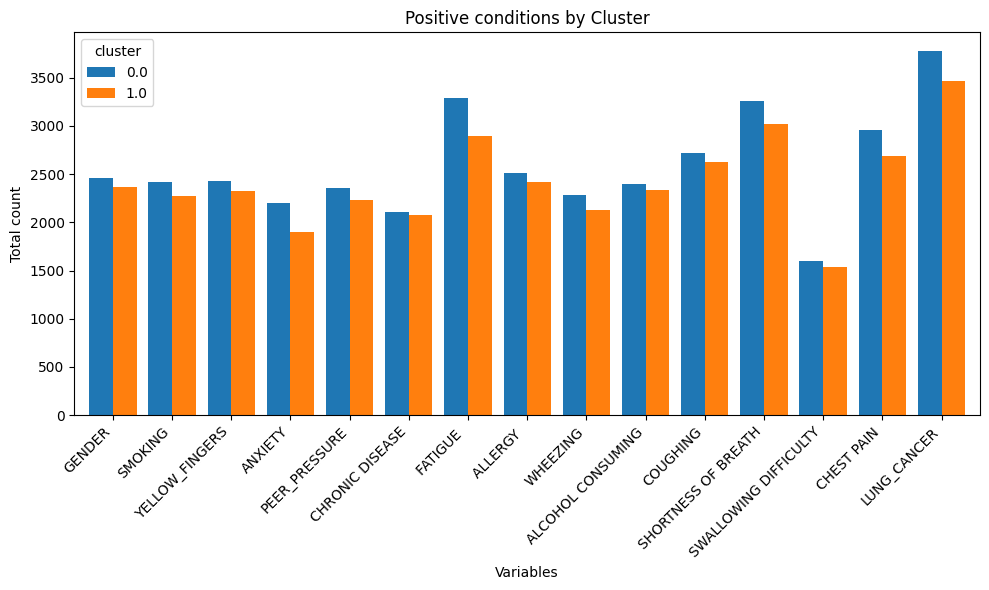

In [23]:
# Identifying health patterns by cluster
grouped_sum = df_cleaned.groupby('cluster').sum()
grouped_sum

grouped_sum.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.ylabel('Total count')
plt.xlabel('Variables')
plt.title('Positive conditions by Cluster')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

From the graph above, we see that the number of male between the two groups are approximately the same.
The other key insight is that each health condition we see, we notice that the count for cluster 0 (Seniors) are consistently higher than the count for cluster 1 (Middle Age).

In [25]:
# Use cross-tab to see how each variable is distributed by cluster
for column in df_cleaned.columns:
    if column != 'cluster':
        crosstab = pd.crosstab(df_cleaned['cluster'], df_cleaned[column])
        print(f"Cross-tab for {column}:")
        print(crosstab)
        print("\n")

Cross-tab for GENDER:
GENDER    0.0   1.0
cluster            
0.0      2152  2460
1.0      2021  2367


Cross-tab for SMOKING:
SMOKING   0.0   1.0
cluster            
0.0      2198  2414
1.0      2113  2275


Cross-tab for YELLOW_FINGERS:
YELLOW_FINGERS   0.0   1.0
cluster                   
0.0             2186  2426
1.0             2062  2326


Cross-tab for ANXIETY:
ANXIETY   0.0   1.0
cluster            
0.0      2409  2203
1.0      2484  1904


Cross-tab for PEER_PRESSURE:
PEER_PRESSURE   0.0   1.0
cluster                  
0.0            2252  2360
1.0            2152  2236


Cross-tab for CHRONIC DISEASE:
CHRONIC DISEASE   0.0   1.0
cluster                    
0.0              2502  2110
1.0              2307  2081


Cross-tab for FATIGUE :
FATIGUE    0.0   1.0
cluster             
0.0       1319  3293
1.0       1492  2896


Cross-tab for ALLERGY :
ALLERGY    0.0   1.0
cluster             
0.0       2099  2513
1.0       1967  2421


Cross-tab for WHEEZING:
WHEEZING   0.0   1.0
c

In [27]:
# Group by the cluster column and calculate the mean of each binary variable
cluster_summary = df_cleaned.groupby('cluster').mean()

print(cluster_summary)

           GENDER   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
cluster                                                                
0.0      0.533391  0.523417        0.526019  0.477667       0.511709   
1.0      0.539426  0.518459        0.530082  0.433911       0.509572   

         CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
cluster                                                                     
0.0             0.457502  0.714007  0.544883  0.494579           0.519514   
1.0             0.474248  0.659982  0.551732  0.486098           0.531222   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
cluster                                                                     
0.0      0.590199             0.706201               0.346921    0.641370   
1.0      0.597767             0.689380               0.349134    0.613719   

         LUNG_CANCER  
cluster               
0.0         0.820035  
1.0         0.789198  


<Axes: >

Text(0, 0.5, 'Total count')

Text(0.5, 0, 'Variables')

Text(0.5, 1.0, 'No conditions by Cluster')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'GENDER'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN'),
  Text(14, 0, 'LUNG_CANCER')])

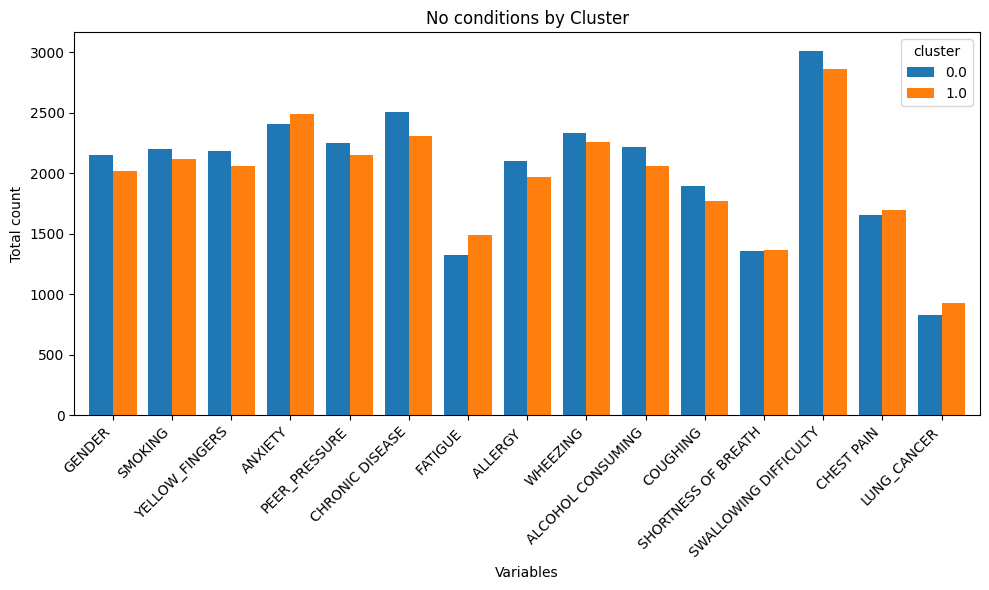

In [29]:
# Identifying health patterns by cluster
import pandas as pd
import matplotlib.pyplot as plt

grouped_sum = df_cleaned.groupby('cluster').sum()

cluster_sizes = df_cleaned.groupby('cluster').count()

grouped_with_no_condition = cluster_sizes - grouped_sum # Obtain count of binary = 0

grouped_with_no_condition.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.ylabel('Total count')
plt.xlabel('Variables')
plt.title('No conditions by Cluster')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


The graph above isn't that intuitive on finding insights.
* Can consider grouping the data by Gender and check if there is different likelihoods of health conditions by gender.
* Can consider grouping specific conditions that have high correlation with each other and plotting likelihood of lung cancer.
    * Eg. Those with Coughing and Allergy on lung cancer.
 
The below statistics shows the overview of all symptoms.

NameError: name 'df_cleaned' is not defined

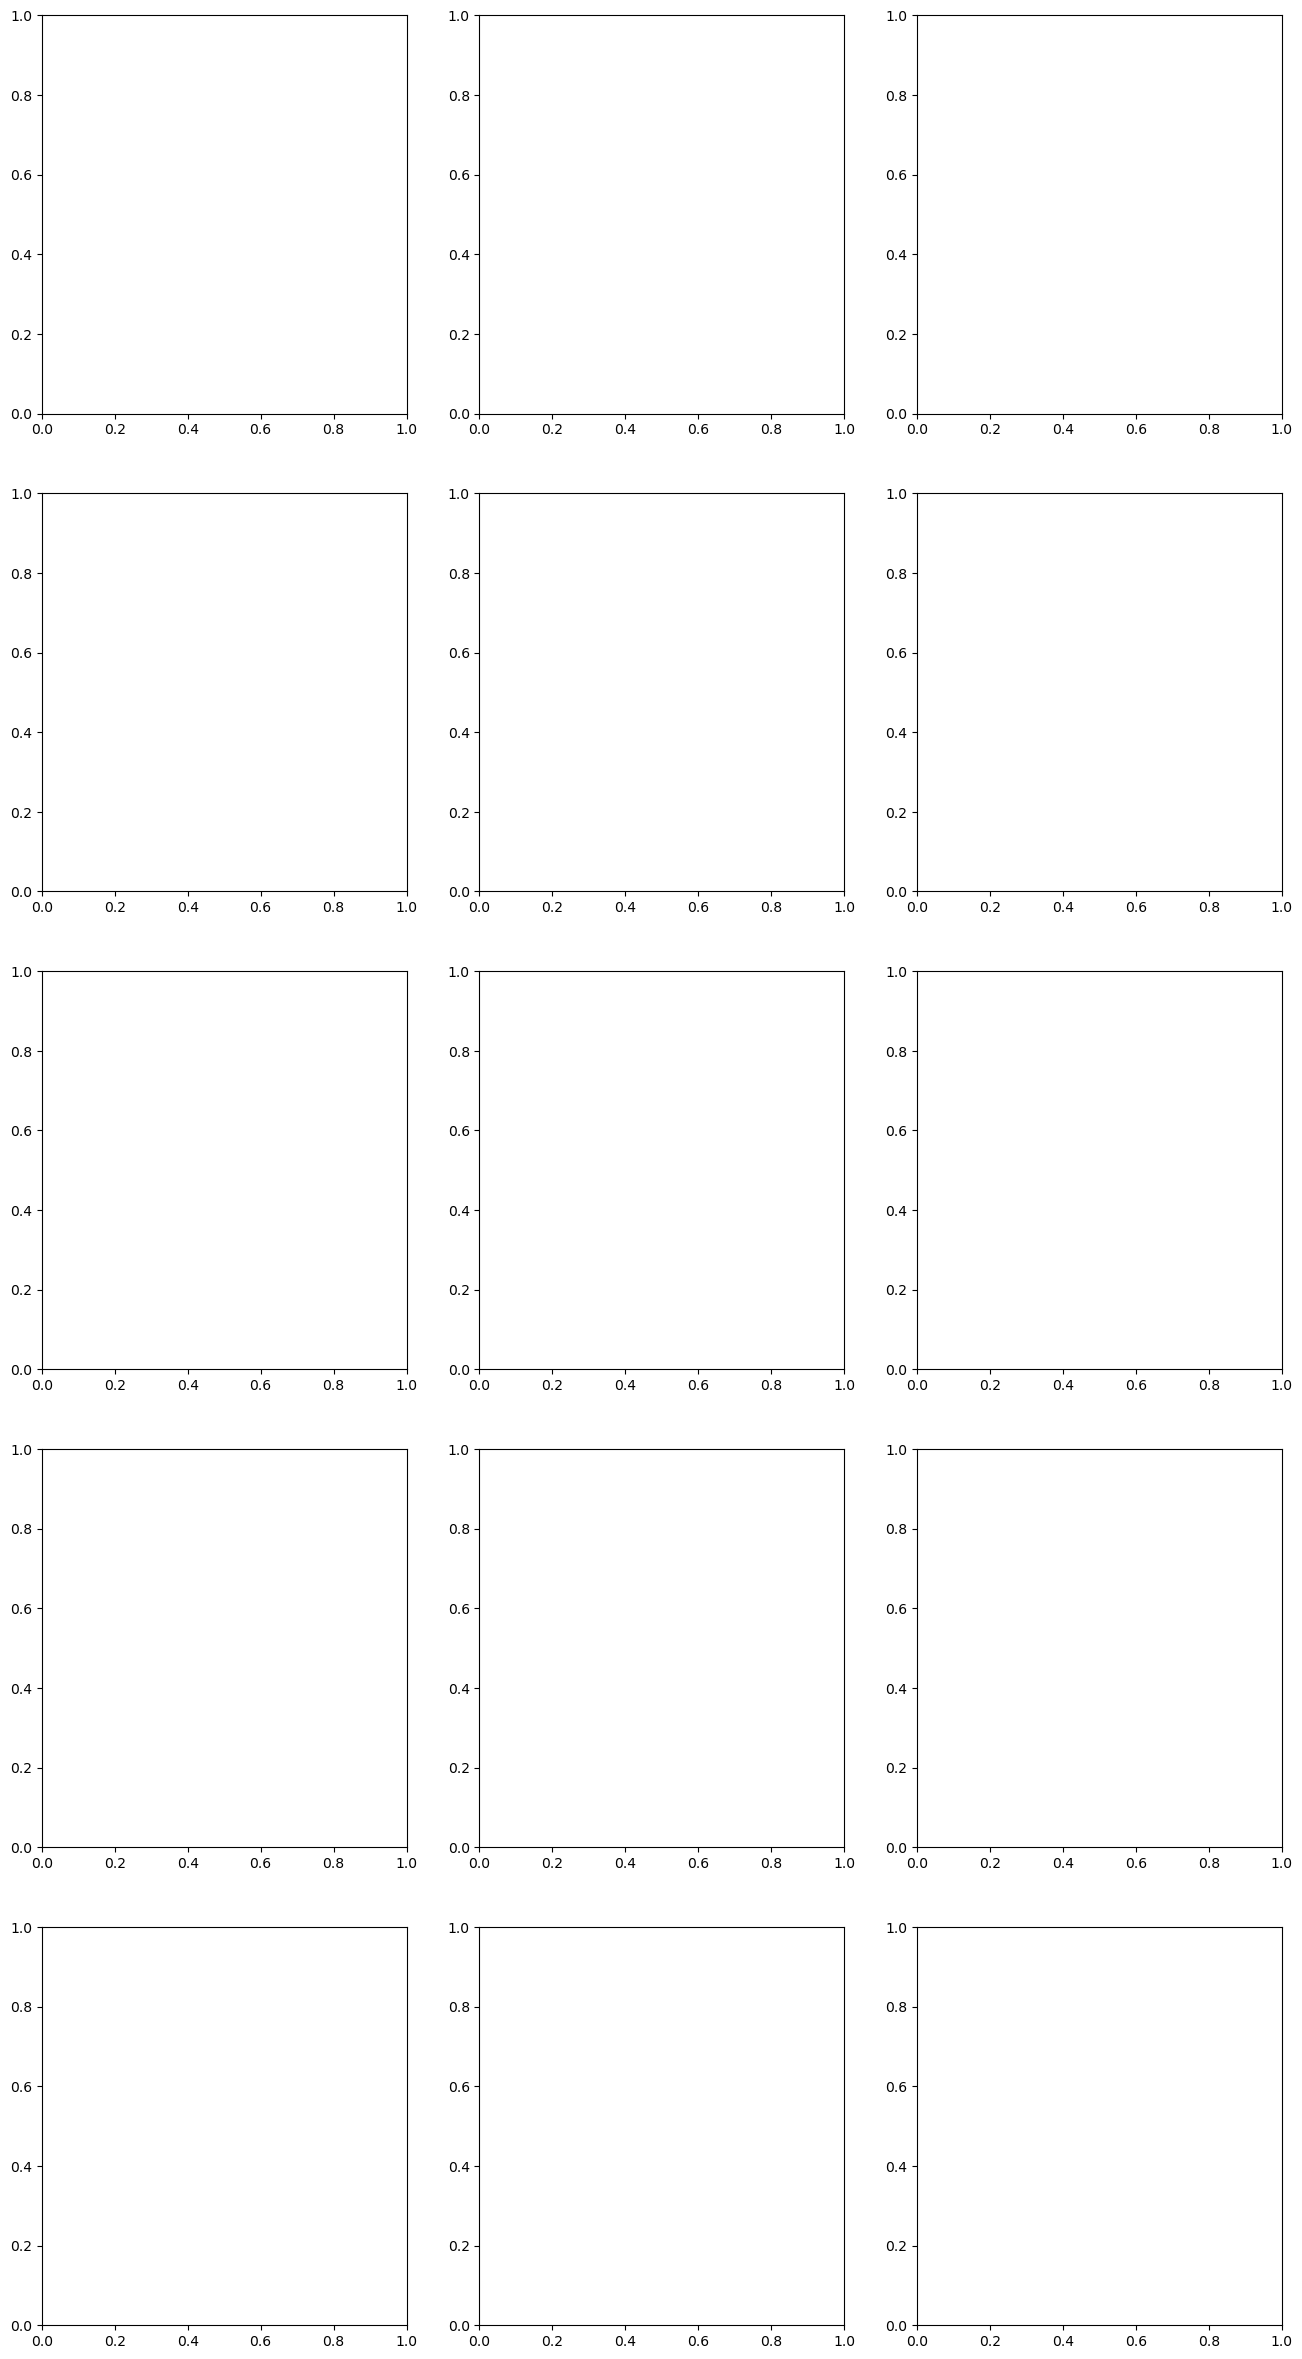

In [32]:
# Overall count statistics of each symptom

X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
fig, ax = plt.subplots(nrows = 5, ncols = 3) 
fig.set_size_inches(16,30) # set figure size

def add_counts(plot):
    for container in plot.containers:
        plot.bar_label(container, fmt='%d')  # Automatically add counts as labels


for i in range(5):
    for j in range(3):
        index = 3 * i + j
        
        if index < len(X):
            # Create the count plot
            plot = sns.countplot(x= df_cleaned[X[3 * i + j]], 
                                 hue=df_cleaned[X[3 * i + j]], 
                                 ax=ax[i][j], 
                                 palette={0.0: "lightblue", 1.0: "orange"}, 
                                 legend=False)
            add_counts(plot)
            plot.set_xticklabels(["No","Yes"])
            plot.set_title(X[index])
        else:
            ax[i][j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

We can see from the countplot above that the data set is heavily skewed to patients having lung cancer, 7245 entries have lung cancer while 1755 entries don't have lung cancer.

If we were to view by the cluster groups, we see the segregation of observations by symptoms.

Text(0.5, 1.0, 'YELLOW_FINGERS')

Text(0.5, 1.0, 'ANXIETY')

Text(0.5, 1.0, 'PEER_PRESSURE')

Text(0.5, 1.0, 'CHRONIC DISEASE')

Text(0.5, 1.0, 'FATIGUE ')

Text(0.5, 1.0, 'ALLERGY ')

Text(0.5, 1.0, 'WHEEZING')

Text(0.5, 1.0, 'ALCOHOL CONSUMING')

Text(0.5, 1.0, 'COUGHING')

Text(0.5, 1.0, 'SHORTNESS OF BREATH')

Text(0.5, 1.0, 'SWALLOWING DIFFICULTY')

Text(0.5, 1.0, 'CHEST PAIN')

Text(0.5, 1.0, 'LUNG_CANCER')

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

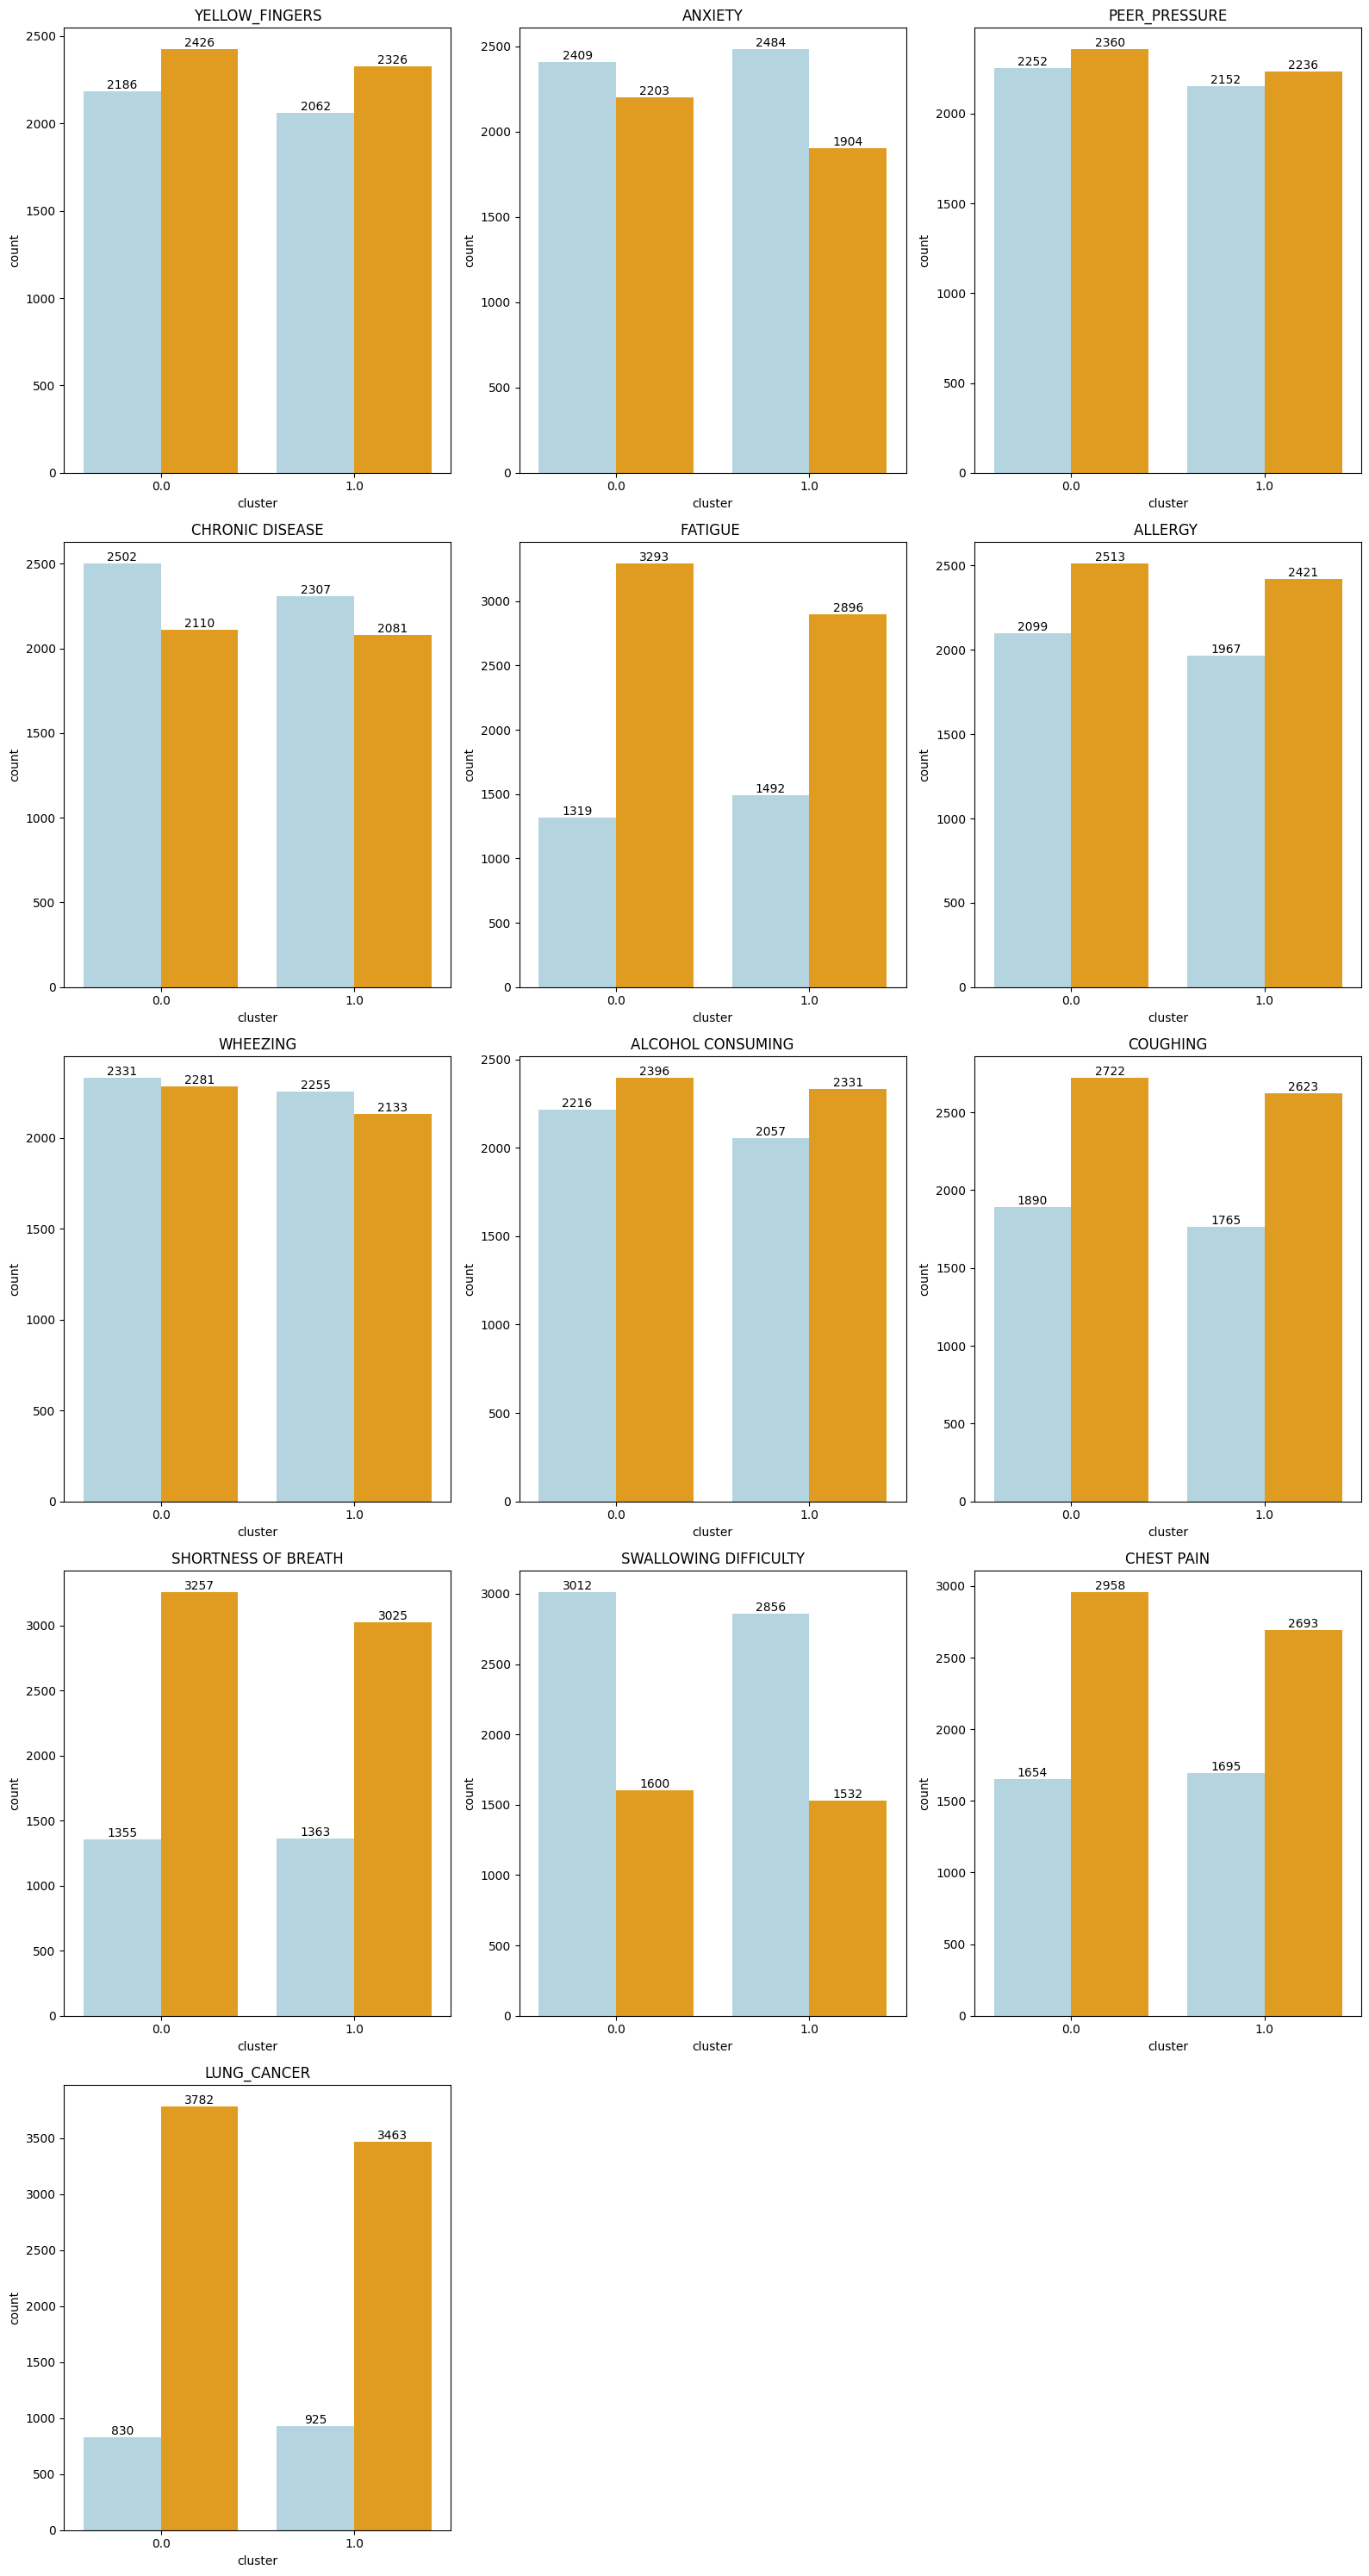

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

fig, ax = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches(16, 30)  

def add_counts(plot):
    for container in plot.containers:
        plot.bar_label(container, fmt='%d')  
        
for i in range(5):
    for j in range(3):
        index = 3 * i + j
        
        if index < len(X):
            # Create the count plot
            plot = sns.countplot(x=df_cleaned["cluster"], 
                                 hue=df_cleaned[X[index]], 
                                 ax=ax[i][j], 
                                 palette={0.0: "lightblue", 1.0: "orange"}, 
                                 legend=False)
            
            add_counts(plot)
            plot.set_title(X[index])
        else:
            ax[i][j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# The X axis represents the group they are in, while the color, blue represent no symptom and the color, orange represent have symptom.

#### Pattern count analysis

Symptoms with respect to having cancer

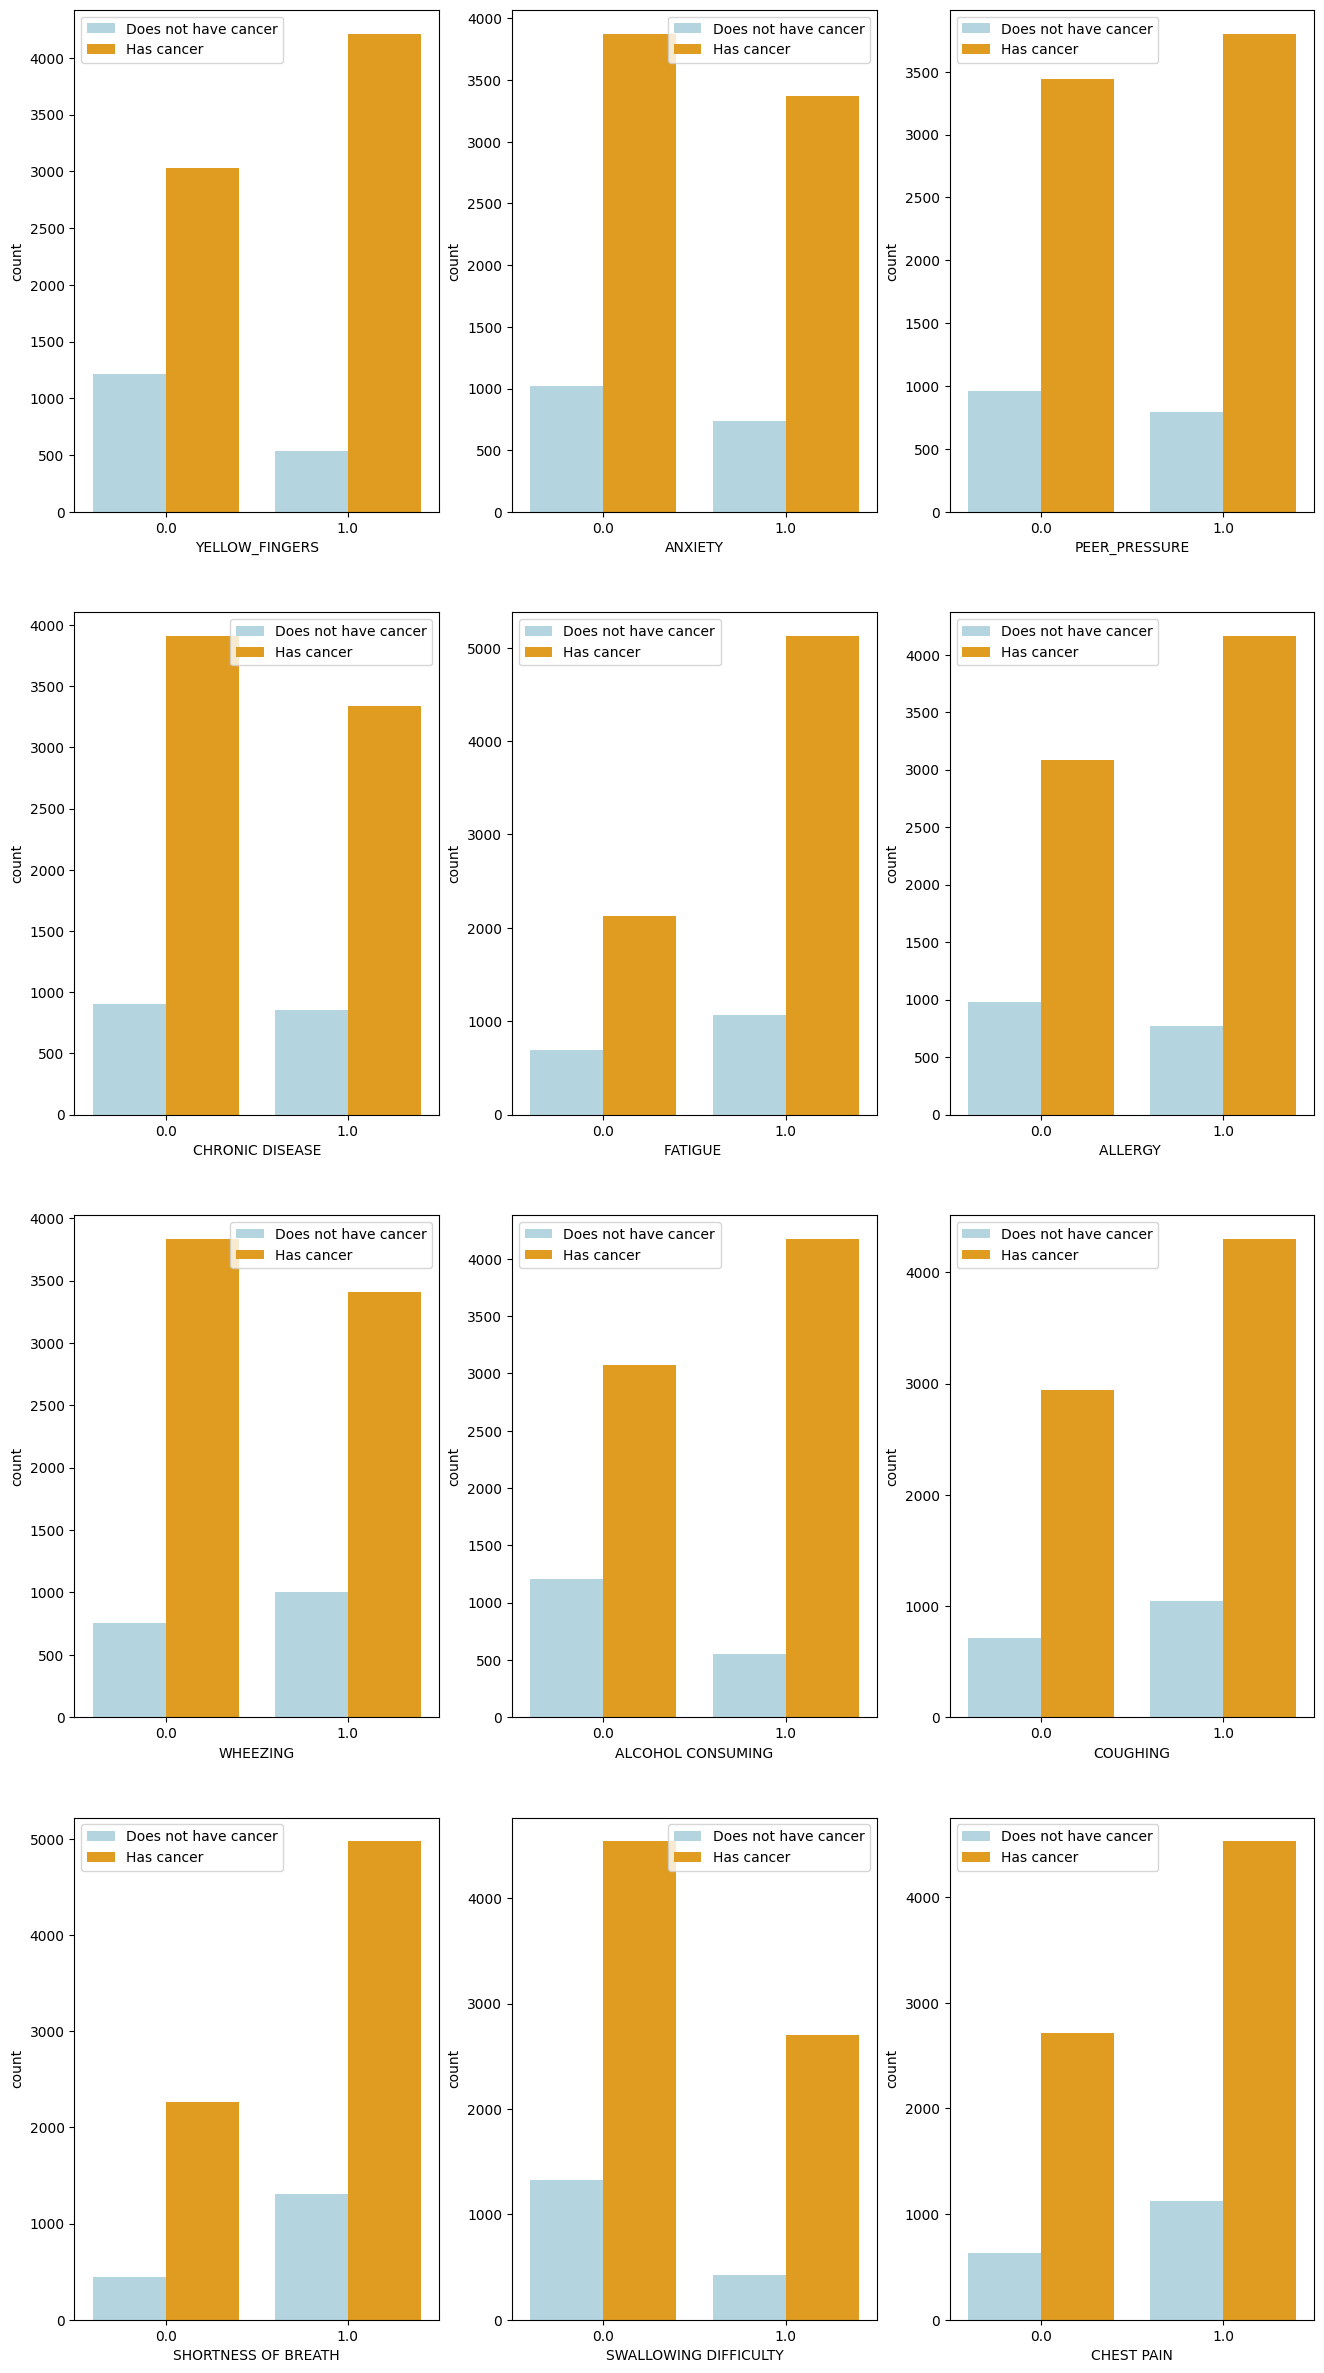

In [41]:
# Full dataset (No grouping)
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig, ax = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(16, 30)  
        
for i in range(4):
    for j in range(3):
        index = 3 * i + j
        
        if index < len(X):
            # Create the count plot
            plot = sns.countplot(x=df_cleaned[X[index]], 
                                 hue=df_cleaned["LUNG_CANCER"], 
                                 ax=ax[i][j], 
                                 palette={0.0: "lightblue", 1.0: "orange"})
            plot.legend([ 'Does not have cancer',"Has cancer",])
        else:
            ax[i][j].axis('off')

# Adjust layout
plt.show()


In [103]:
# Counting the values for each symptom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Prepare to store the ratios
symptom_ratios = {}

# Loop through each column and calculate the ratio
for column in df_cleaned.columns:
    counts = df_cleaned[column].value_counts()
    if 0 in counts and 1 in counts:  # Ensure both 0 and 1 are present to avoid division by zero
        ratio = counts[1] / counts[0]  # Ratio of have symptom to no symptom
    else:
        ratio = np.nan  # Handle cases where a count might be zero
    symptom_ratios[column] = ratio

# Convert to DataFrame for easier viewing
symptom_ratios_df = pd.DataFrame(list(symptom_ratios.items()), columns=['Symptom', 'Ratio'])
symptom_ratios_df

Symptom     Ratio
0                  GENDER  1.156722
1                 SMOKING  1.087683
2          YELLOW_FINGERS  1.118644
3                 ANXIETY  0.839362
4           PEER_PRESSURE  1.043597
5         CHRONIC DISEASE  0.871491
6                FATIGUE   2.201708
7                ALLERGY   1.213478
8                WHEEZING  0.962495
9       ALCOHOL CONSUMING  1.106249
10               COUGHING  1.462380
11    SHORTNESS OF BREATH  2.311258
12  SWALLOWING DIFFICULTY  0.533742
13             CHEST PAIN  1.687369
14            LUNG_CANCER  4.128205
15                cluster  0.951431

In [28]:
symptoms = df_cleaned.columns.drop(["LUNG_CANCER","AGE"])
ratios = {}
for symptom in symptoms:
    grouped = df_cleaned.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped['Ratio'] = grouped[1] / grouped[0]
    ratios[symptom] = grouped

# Display the results for each symptom
for symptom, result in ratios.items():
    print(f"Ratios for {symptom}:")
    print(result)
    print("\n")


Ratios for GENDER:
LUNG_CANCER   0.0   1.0     Ratio
GENDER                           
0.0           563  3610  6.412078
1.0          1192  3635  3.049497


Ratios for SMOKING:
LUNG_CANCER  0.0   1.0     Ratio
SMOKING                         
0.0          953  3358  3.523610
1.0          802  3887  4.846633


Ratios for YELLOW_FINGERS:
LUNG_CANCER      0.0   1.0     Ratio
YELLOW_FINGERS                      
0.0             1216  3032  2.493421
1.0              539  4213  7.816327


Ratios for ANXIETY:
LUNG_CANCER   0.0   1.0     Ratio
ANXIETY                          
0.0          1017  3876  3.811209
1.0           738  3369  4.565041


Ratios for PEER_PRESSURE:
LUNG_CANCER    0.0   1.0     Ratio
PEER_PRESSURE                     
0.0            962  3442  3.577963
1.0            793  3803  4.795712


Ratios for CHRONIC DISEASE:
LUNG_CANCER      0.0   1.0     Ratio
CHRONIC DISEASE                     
0.0              900  3909  4.343333
1.0              855  3336  3.901754


Ratios f

In [46]:
cluster_0 = df_cleaned[df_cleaned["cluster"] == 0]
cluster_1 = df_cleaned[df_cleaned["cluster"] == 1]
symptoms = cluster_0.columns.drop(["LUNG_CANCER","AGE"])
ratios_0 = {}
ratios_1 = {}
for symptom in symptoms:
    grouped_0 = cluster_0.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped_0['Ratio'] = grouped_0[1] / grouped_0[0]
    ratios_0[symptom] = grouped_0
    grouped_1 = cluster_1.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped_1['Ratio'] = grouped_1[1] / grouped_1[0]
    ratios_1[symptom] = grouped_1

# Display the results for each symptom
for (symptom_0, result_0), (symptom_1, result_1) in zip(ratios_0.items(), ratios_1.items()):
    print(f"Ratios for {symptom} for Senior:")
    print(result_0)
    print("\n")
    print(f"Ratios for {symptom} for MiddleAge:")
    print(result_1)
    print("\n")
    print("\n")

Ratios for cluster for Senior:
LUNG_CANCER  0.0   1.0     Ratio
GENDER                          
0.0          277  1875  6.768953
1.0          553  1907  3.448463


Ratios for cluster for MiddleAge:
LUNG_CANCER  0.0   1.0     Ratio
GENDER                          
0.0          286  1735  6.066434
1.0          639  1728  2.704225




Ratios for cluster for Senior:
LUNG_CANCER  0.0   1.0     Ratio
SMOKING                         
0.0          418  1780  4.258373
1.0          412  2002  4.859223


Ratios for cluster for MiddleAge:
LUNG_CANCER  0.0   1.0     Ratio
SMOKING                         
0.0          535  1578  2.949533
1.0          390  1885  4.833333




Ratios for cluster for Senior:
LUNG_CANCER     0.0   1.0     Ratio
YELLOW_FINGERS                     
0.0             562  1624  2.889680
1.0             268  2158  8.052239


Ratios for cluster for MiddleAge:
LUNG_CANCER     0.0   1.0     Ratio
YELLOW_FINGERS                     
0.0             654  1408  2.152905
1.0        

In [36]:
cluster_1 = df_cleaned[df_cleaned["cluster"] == 1]
symptoms = cluster_0.columns.drop(["LUNG_CANCER","AGE"])
ratios = {}
for symptom in symptoms:
    grouped = cluster_0.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped['Ratio'] = grouped[1] / grouped[0]
    ratios[symptom] = grouped

# Display the results for each symptom
for symptom, result in ratios.items():
    print(f"Ratios for {symptom}:")
    print(result)
    print("\n")

Ratios for GENDER:
LUNG_CANCER  0.0   1.0     Ratio
GENDER                          
0.0          286  1735  6.066434
1.0          639  1728  2.704225


Ratios for SMOKING:
LUNG_CANCER  0.0   1.0     Ratio
SMOKING                         
0.0          535  1578  2.949533
1.0          390  1885  4.833333


Ratios for YELLOW_FINGERS:
LUNG_CANCER     0.0   1.0     Ratio
YELLOW_FINGERS                     
0.0             654  1408  2.152905
1.0             271  2055  7.583026


Ratios for ANXIETY:
LUNG_CANCER  0.0   1.0     Ratio
ANXIETY                         
0.0          560  1924  3.435714
1.0          365  1539  4.216438


Ratios for PEER_PRESSURE:
LUNG_CANCER    0.0   1.0     Ratio
PEER_PRESSURE                     
0.0            494  1658  3.356275
1.0            431  1805  4.187935


Ratios for CHRONIC DISEASE:
LUNG_CANCER      0.0   1.0     Ratio
CHRONIC DISEASE                     
0.0              456  1851  4.059211
1.0              469  1612  3.437100


Ratios for FATIGUE :

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

<Axes: xlabel='ANXIETY', ylabel='count'>

<Axes: xlabel='PEER_PRESSURE', ylabel='count'>

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

<Axes: xlabel='FATIGUE ', ylabel='count'>

<Axes: xlabel='ALLERGY ', ylabel='count'>

<Axes: xlabel='WHEEZING', ylabel='count'>

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='count'>

<Axes: xlabel='COUGHING', ylabel='count'>

<Axes: xlabel='SHORTNESS OF BREATH', ylabel='count'>

<Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='count'>

<Axes: xlabel='CHEST PAIN', ylabel='count'>

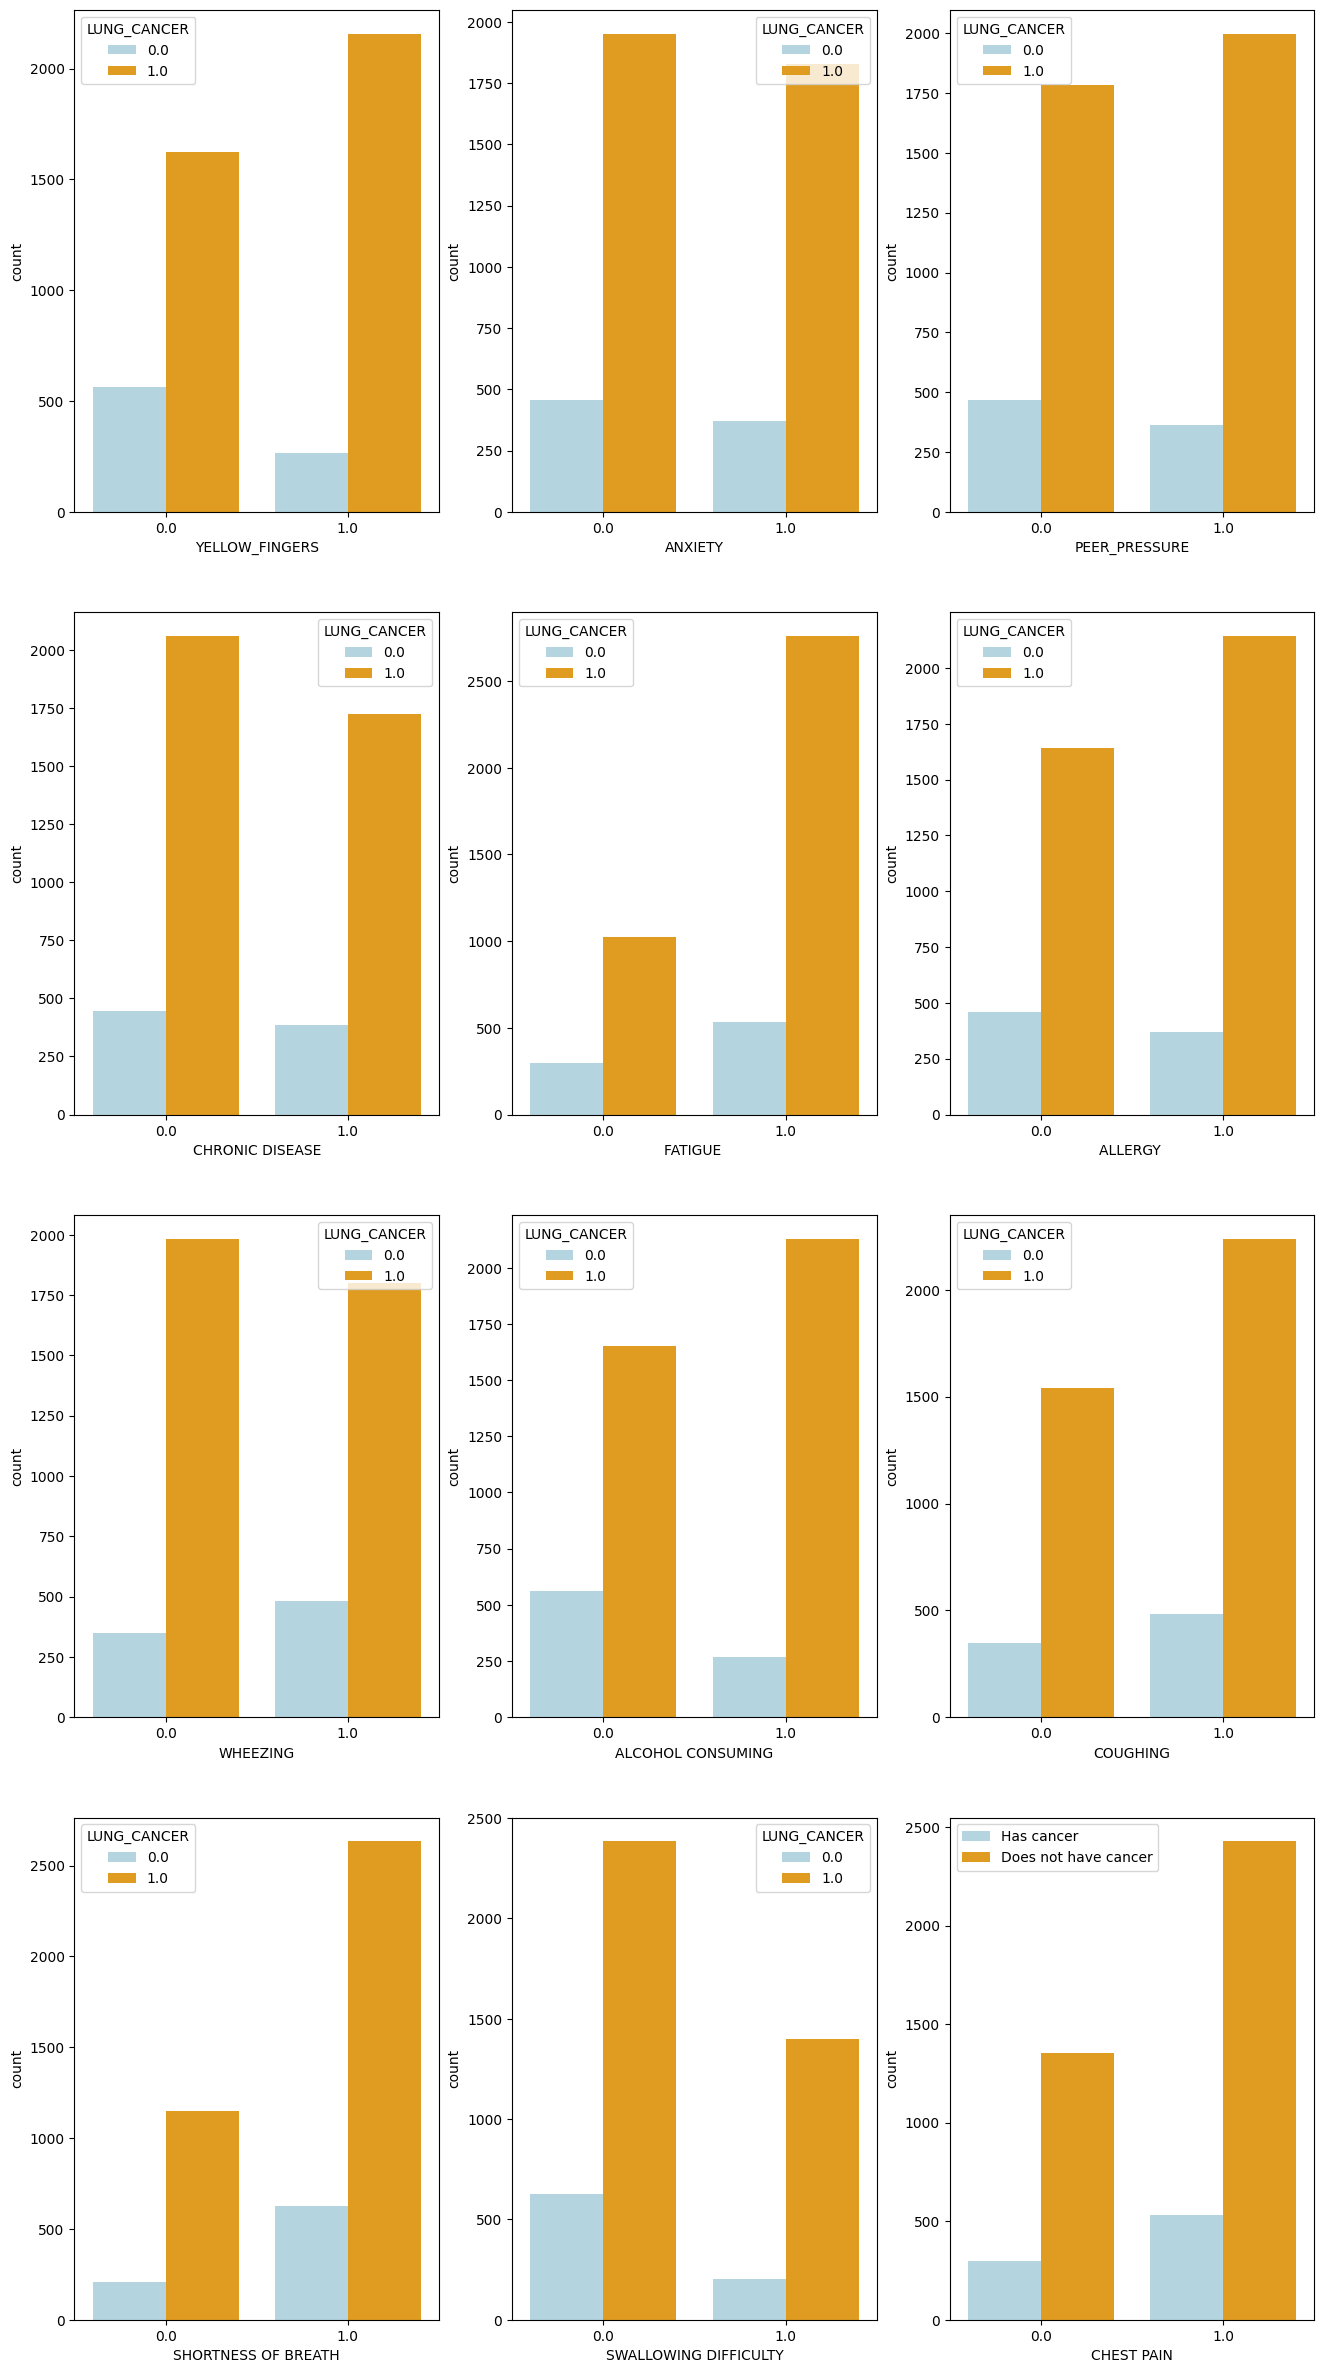

In [54]:
# Grouped in cluster 0, Seniors
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig, ax = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(16, 30)  


df_seniors = df_cleaned[df_cleaned["cluster"] == 0.0]
        
for i in range(4):
    for j in range(3):
        index = 3 * i + j
        
        if index < len(X):
            # Create the count plot
            plot = sns.countplot(x=df_seniors[X[index]], 
                                 hue=df_cleaned["LUNG_CANCER"], 
                                 ax=ax[i][j], 
                                 palette={0.0: "lightblue", 1.0: "orange"})
            plot
            plt.legend(["Has cancer", 'Does not have cancer'])
        else:
            ax[i][j].axis('off')

plt.show()

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

<Axes: xlabel='ANXIETY', ylabel='count'>

<Axes: xlabel='PEER_PRESSURE', ylabel='count'>

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

<Axes: xlabel='FATIGUE ', ylabel='count'>

<Axes: xlabel='ALLERGY ', ylabel='count'>

<Axes: xlabel='WHEEZING', ylabel='count'>

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='count'>

<Axes: xlabel='COUGHING', ylabel='count'>

<Axes: xlabel='SHORTNESS OF BREATH', ylabel='count'>

<Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='count'>

<Axes: xlabel='CHEST PAIN', ylabel='count'>

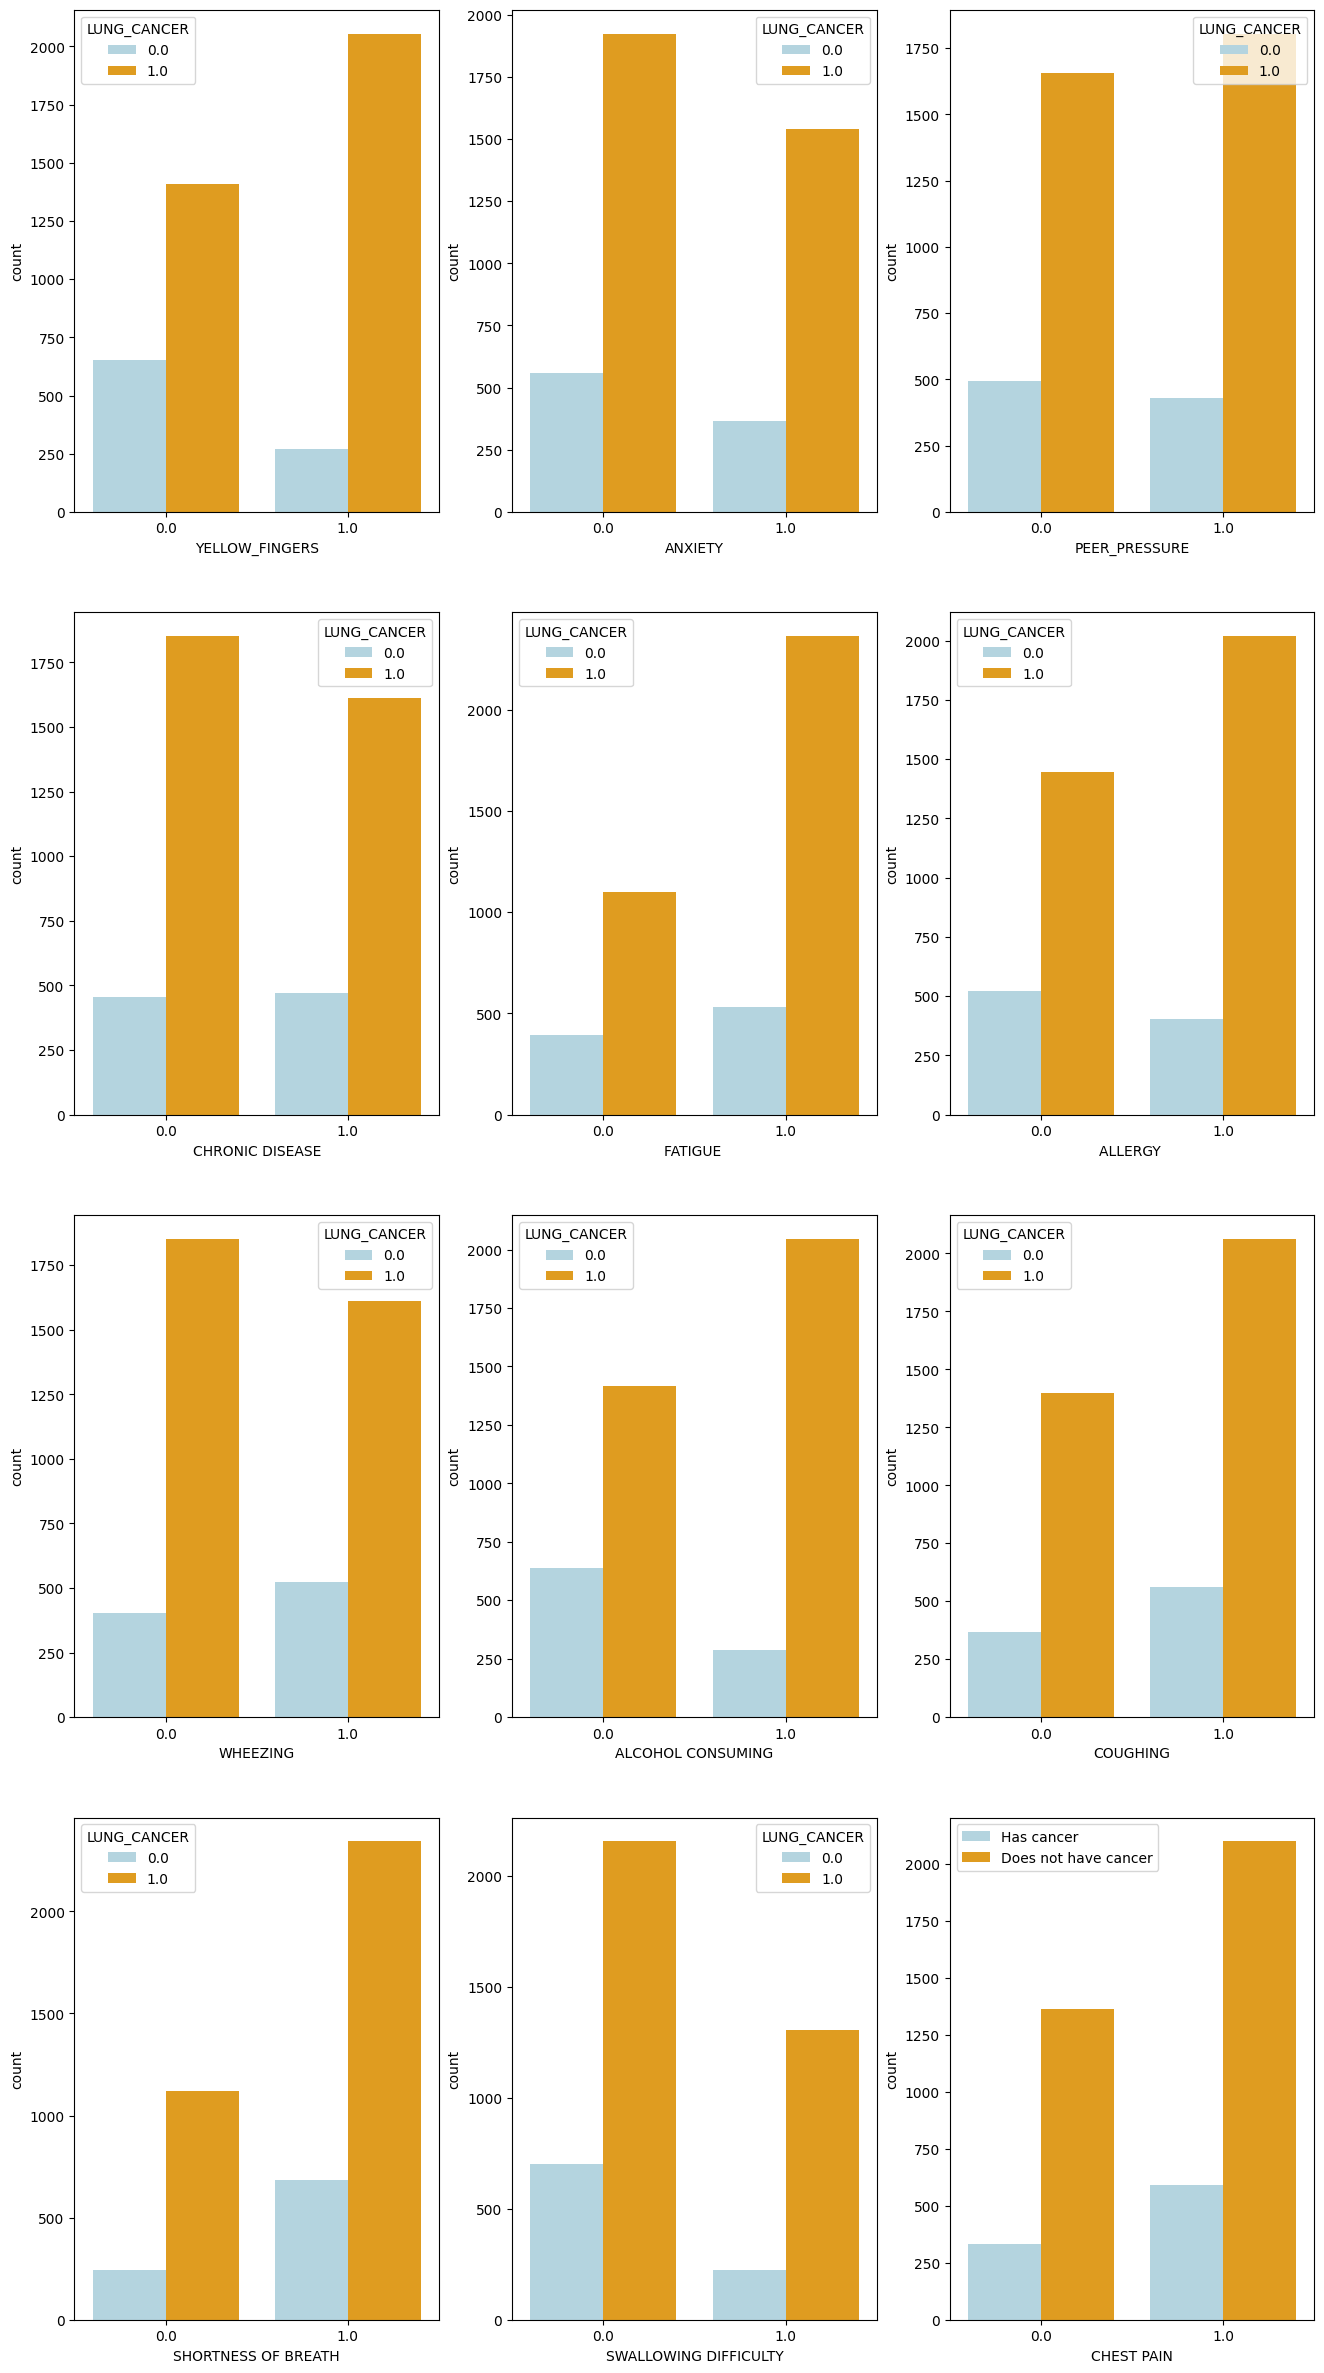

In [56]:
# Grouped in cluster 1, Middle Aged
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig, ax = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(16, 30)  


df_middleaged = df_cleaned[df_cleaned["cluster"] == 1.0]

        
for i in range(4):
    for j in range(3):
        index = 3 * i + j
        
        if index < len(X):
            # Create the count plot
            plot = sns.countplot(x=df_middleaged[X[index]], 
                                 hue=df_cleaned["LUNG_CANCER"], 
                                 ax=ax[i][j], 
                                 palette={0.0: "lightblue", 1.0: "orange"})
            plot
            plt.legend(["Has cancer", 'Does not have cancer'])
        else:
            ax[i][j].axis('off')

plt.show()

#### Logistic Regression
To find statistical significance of features

In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # This package is from sklearn where it churns out statistical reports

x = df_cleaned.drop(labels ="LUNG_CANCER", axis = 1)
y = df_cleaned["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8984
Method:                           MLE   Df Model:                           15
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:                  0.1877
Time:                        16:06:34   Log-Likelihood:                -3607.0
converged:                       True   LL-Null:                       -4440.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1951      0.131      1.485      0.138      -0.062       0.

A simple logistic regression to showcase the trends of each variable on Lung cancer.
Formula for probability: 1/1+exp(x), where x is the value of the logistic regression prediction.

Statistically significant variables:
* Gender: Females are less likely to get lung cancer
* Smoking: Those who smoke have a higher probability of getting lung cancer
* Yellow Fingers: Those who have yellow fingers have a higher probability of getting lung cancer (Higher coefficient)
* Peer pressure: Those who have peer pressure have a higher probability of getting lung cancer
* Fatigue: Those who have fatigue have a higher probability of getting lung cancer
* Allergy: Those who have allergy have a higher probability of getting lung cancer
* Wheezing: Those who have wheezing have a lower probability of getting lung cancer
* Alcohol consumption: Those who consume alcohol have a higher probability of getting lung cancer (Higher coefficient)
* Shortness of breath: Those who have shortness of breath have a lower probability of getting lung cancer
* Cluster: Those who are below the age of 61 have a lower likelihood of lung cancer

#### Cramer's V

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    # Create a contingency table
    contingency_table = pd.crosstab(var1, var2)
    
    # Perform chi-squared test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.sum().sum()  # total number of observations
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def calculate_cramers_v_for_dataframe(df):
    # Create a DataFrame to store the results
    cols = df.columns
    cramers_v_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
    
    # Loop over each pair of variables
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                cramers_v_matrix.loc[col1, col2] = 1.0  # Cramer's V with itself is 1
            else:
                cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    return cramers_v_matrix

# Calculate Cramér's V for all pairs of variables
cramers_v_df = calculate_cramers_v_for_dataframe(df_cleaned)

cramers_v_df

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.055683  0.010868        0.031759  0.039464   
AGE                    0.055683  1.000000  0.079466        0.086689  0.090242   
SMOKING                0.010868  0.079466  1.000000        0.001652  0.013286   
YELLOW_FINGERS         0.031759  0.086689  0.001652        1.000000  0.062114   
ANXIETY                0.039464  0.090242  0.013286        0.062114  1.000000   
PEER_PRESSURE          0.074208  0.083606  0.026258        0.055127  0.040248   
CHRONIC DISEASE        0.004142  0.077120  0.029434        0.008769  0.032643   
FATIGUE                0.048975  0.098011  0.001455        0.001101  0.017688   
ALLERGY                0.052933  0.064558  0.024083        0.028020  0.047087   
WHEEZING               0.036603  0.087429  0.032120        0.043228  0.039159   
ALCOHOL CONSUMING      0.040270  0.124647  0.019717        0.075484  0.001603   
COUGHING               0.027130  0.083978  0.006904        0.014657  0.058415   
SHORTNESS OF BREATH    0.017594  0.074128  0.003596        0.015806  0.004949   
SWALLOWING DIFFICULTY  0.009026  0.064745  0.003862        0.064857  0.077864   
CHEST PAIN             0.043643  0.085719  0.009814        0.018063  0.053183   
LUNG_CANCER            0.140725  0.086013  0.062793        0.217482  0.035114   
cluster                0.005826  1.000000  0.004738        0.003845  0.043687   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                      0.074208         0.004142  0.048975  0.052933   
AGE                         0.083606         0.077120  0.098011  0.064558   
SMOKING                     0.026258         0.029434  0.001455  0.024083   
YELLOW_FINGERS              0.055127         0.008769  0.001101  0.028020   
ANXIETY                     0.040248         0.032643  0.017688  0.047087   
PEER_PRESSURE               1.000000         0.009044  0.003845  0.055440   
CHRONIC DISEASE             0.009044         1.000000  0.009858  0.024125   
FATIGUE                     0.003845         0.009858  1.000000  0.025748   
ALLERGY                     0.055440         0.024125  0.025748  1.000000   
WHEEZING                    0.054059         0.010227  0.027749  0.049416   
ALCOHOL CONSUMING           0.057162         0.028417  0.019733  0.064853   
COUGHING                    0.051149         0.074606  0.001503  0.025118   
SHORTNESS OF BREATH         0.047690         0.007674  0.046255  0.007504   
SWALLOWING DIFFICULTY       0.105968         0.050051  0.022283  0.027434   
CHEST PAIN                  0.020820         0.023033  0.015130  0.013162   
LUNG_CANCER                 0.057627         0.020945  0.084932  0.106295   
cluster                     0.001915         0.016557  0.058029  0.006656   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.036603           0.040270  0.027130   
AGE                    0.087429           0.124647  0.083978   
SMOKING                0.032120           0.019717  0.006904   
YELLOW_FINGERS         0.043228           0.075484  0.014657   
ANXIETY                0.039159           0.001603  0.058415   
PEER_PRESSURE          0.054059           0.057162  0.051149   
CHRONIC DISEASE        0.010227           0.028417  0.074606   
FATIGUE                0.027749           0.019733  0.001503   
ALLERGY                0.049416           0.064853  0.025118   
WHEEZING               1.000000           0.126036  0.048912   
ALCOHOL CONSUMING      0.126036           1.000000  0.070764   
COUGHING               0.048912           0.070764  1.000000   
SHORTNESS OF BREATH    0.009938           0.011605  0.033849   
SWALLOWING DIFFICULTY  0.027730           0.031062  0.082911   
CHEST PAIN             0.009656           0.024613  0.020798   
LUNG_CANCER            0.080092           0.207378  0.000128   
cluster                0.008257           0.011496  0.007475   

                       SHO

In [89]:
#### Suggestion: Combine variables that may be go together. 
# For example, yellow fingers is also caused from a bad liver. Bad liver is caused by alcohol consumption. 
# Combining yellow fingers and alcohol consumption together creates a variable where 1 = Have both symptoms, 0 = Have no symptom
# From the data, correlation between this new variable with lung cancer decreases substantially, 
# suggesting that yellow fingers and alcohol consumption may not cause lung cancer despite having high correlation scores as individual symptom.

df_IV = df_cleaned

df_IV["cluster_fatigue"] = df_IV["cluster"]*df_IV["FATIGUE "]
df_IV["Yellowfinger_alcoholconsumption"] = df_IV["cluster"]*df_IV["FATIGUE "]
df_IV["Shortness_of_breath_Chestpain"] = df_IV["SHORTNESS OF BREATH"]*df_IV["CHEST PAIN"]
df_IV["Shortness_of_breath_WHEEZING"] = df_IV["SHORTNESS OF BREATH"]*df_IV["WHEEZING"]
df_IV.corr()

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_23467/187592086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IV["cluster_fatigue"] = df_IV["cluster"]*df_IV["FATIGUE "]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_23467/187592086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IV["Yellowfinger_alcoholconsumption"] = df_IV["cluster"]*df_IV["FATIGUE "]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_23467/187592086.py:11: SettingWithCopyWarning: 
A value is

GENDER       AGE   SMOKING  YELLOW_FINGERS  \
GENDER                           1.000000 -0.005543 -0.011091       -0.031982   
AGE                             -0.005543  1.000000  0.008597        0.004523   
SMOKING                         -0.011091  0.008597  1.000000        0.001875   
YELLOW_FINGERS                  -0.031982  0.004523  0.001875        1.000000   
ANXIETY                         -0.039688  0.032944  0.013509        0.062337   
PEER_PRESSURE                   -0.074431  0.007555 -0.026481        0.055349   
CHRONIC DISEASE                 -0.004365 -0.008329 -0.029657        0.008992   
FATIGUE                         -0.049215  0.053613  0.001695       -0.001341   
ALLERGY                          0.053157 -0.019463  0.024306       -0.028243   
WHEEZING                         0.036826  0.001679 -0.032343       -0.043450   
ALCOHOL CONSUMING                0.040493 -0.004965 -0.019939       -0.075707   
COUGHING                         0.027357  0.003587 -0.007131        0.014883   
SHORTNESS OF BREATH              0.017837  0.018522 -0.003838        0.016048   
SWALLOWING DIFFICULTY           -0.009260 -0.006974 -0.004096        0.065091   
CHEST PAIN                       0.043874  0.020547  0.010044       -0.018293   
LUNG_CANCER                     -0.141006  0.052523  0.063074        0.217762   
cluster                          0.006049 -0.878864 -0.004961        0.004068   
YF_LC                           -0.032468 -0.001213  0.591359        0.583118   
cluster_fatigue                 -0.019661 -0.621676 -0.000389        0.003293   
Yellowfinger_smoking            -0.032468 -0.001213  0.591359        0.583118   
Yellowfinger_alcoholconsumption -0.019661 -0.621676 -0.000389        0.003293   
Shortness_of_breath_Chestpain    0.037589  0.028976  0.003565       -0.001601   
Shortness_of_breath_WHEEZING     0.032018  0.005600 -0.023934       -0.018665   

                                  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
GENDER                          -0.039688      -0.074431        -0.004365   
AGE                              0.032944       0.007555        -0.008329   
SMOKING                          0.013509      -0.026481        -0.029657   
YELLOW_FINGERS                   0.062337       0.055349         0.008992   
ANXIETY                          1.000000       0.040471        -0.032866   
PEER_PRESSURE                    0.040471       1.000000         0.009267   
CHRONIC DISEASE                 -0.032866       0.009267         1.000000   
FATIGUE                         -0.017928      -0.004084        -0.010099   
ALLERGY                         -0.047311      -0.055663         0.024349   
WHEEZING                        -0.039382      -0.054281        -0.010450   
ALCOHOL CONSUMING               -0.001826      -0.057384        -0.028640   
COUGHING                        -0.058642      -0.051376        -0.074833   
SHORTNESS OF BREATH             -0.005192      -0.047932        -0.007917   
SWALLOWING DIFFICULTY            0.078098       0.106201         0.050285   
CHEST PAIN                      -0.053414      -0.021050        -0.023264   
LUNG_CANCER                      0.035395       0.057908        -0.021226   
cluster                         -0.043911      -0.002137         0.016780   
YF_LC                            0.045082       0.025644        -0.002420   
cluster_fatigue                 -0.035117      -0.001375        -0.000749   
Yellowfinger_smoking             0.045082       0.025644        -0.002420   
Yellowfinger_alcoholconsumption -0.035117      -0.001375        -0.000749   
Shortness_of_breath_Chestpain   -0.049404      -0.040078        -0.016857   
Shortness_of_breath_WHEEZING    -0.020909      -0.059437        -0.021793   

                                 FATIGUE   ALLERGY   WHEEZING  ...  \
GENDER                          -0.049215  0.053157  0.036826  ...   
AGE                              0.053613 -0.019463  0.001679  ...   
SMOKING                        

In [79]:
df_cleaned.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'cluster',
       'YF_LC'],
      dtype='object')